# Machine Learning - Presentation - Team 6

### Team Members - 
##### (1) Ganesh Vasant Kini Kulai
##### (2) Abhishek Kumar Singh
##### (3) Dinu Thomas
##### (4) Charithra Chandrashekar

### Topic - Prediction of bike rental service in a large metropolitan city

![Image](https://www.icebike.org/wp-content/uploads/2015/08/bike-rental-shop-14716686.jpg)

## PROBLEM STATEMENT:

With a continuously developing world, bike rentals have become a very popular mode of commmute, for both leisure and general travel purposes. However, the usage and availability of bikes at various rental services and street side kiosks are affected by several parameters driving the demand and usability of bikes in general, like climate, time of day, etc. So, it is important for rental companies to predict the demand for bike rental services, which helps a lot in fulfilling the demand and make adequate supplies available at the most profitable locations and time.

The problem here is to predict the number of bike rental pickups in a day depending on relevant variables that impact the usability of a bike and affect the number of orders. Here the predicted or target variable is numeric, so we will try to solve it as a Linear Regression Problem.

### Importing The Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import optimize
from warnings import filterwarnings
filterwarnings('ignore')

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# import function to perform linear regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from statistics import mean

from sklearn.model_selection import KFold
from sklearn.kernel_ridge import KernelRidge
from scipy.stats import pearsonr

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

import datetime

# 1 Exploratory Data Analysis

In [3]:
bikeData = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')

bikeData_orig = bikeData.copy()

In [4]:
bikeData.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
bikeData.describe(include='object')

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,29/03/2018,Summer,No Holiday,Yes
freq,24,2208,8328,8465


In [6]:
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
bikeData['Hour'].describe()

count    8760.000000
mean       11.500000
std         6.922582
min         0.000000
25%         5.750000
50%        11.500000
75%        17.250000
max        23.000000
Name: Hour, dtype: float64

In [8]:
bikeData.shape

(8760, 14)

<a id="outliers"></a>
## 1.1 Outlier Analysis and Treatment

**Checking the outliers in all the variables and treat them using appropriate techniques.**

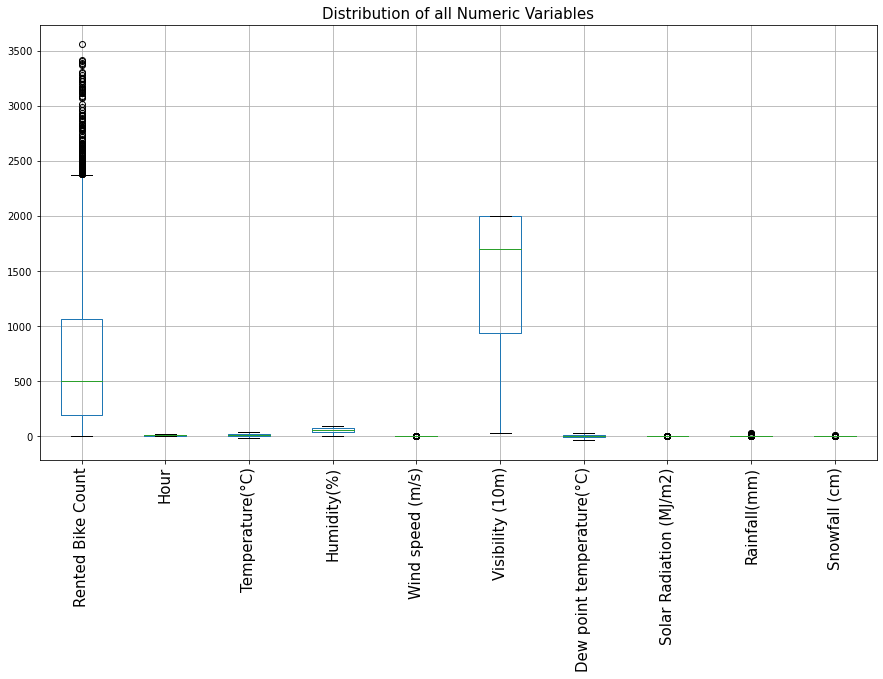

In [9]:
plt.figure(figsize=(15,8))
# plot a boxplot to visualize the outliers in all the numeric variables
bikeData.boxplot()

# set plot label
# set text size using 'fontsize'

plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
# set text size using 'fontsize'
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Notice that the variable 'Rented Bike Count' has a quite large range as compared to the other variables.**

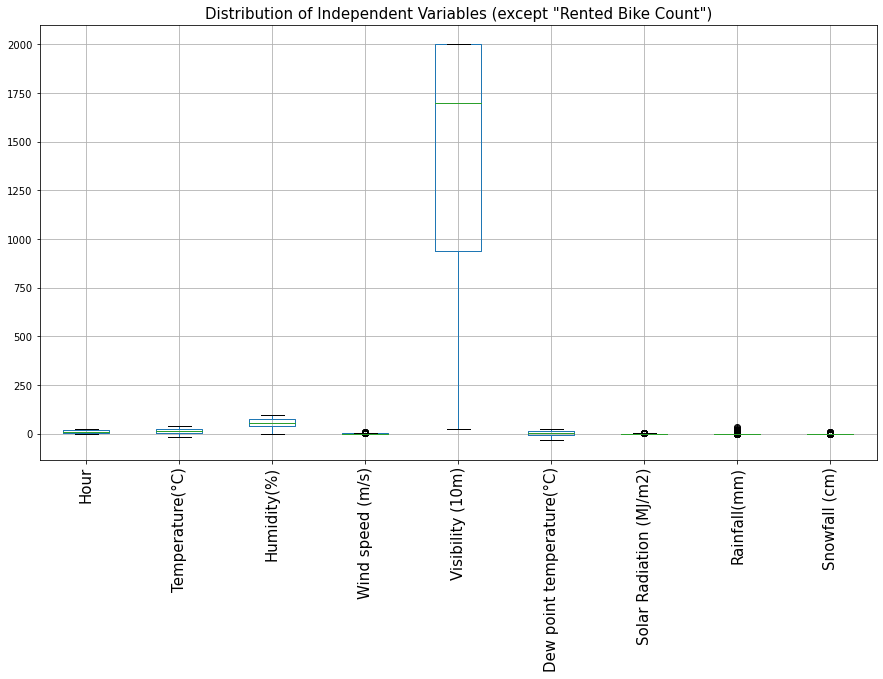

In [10]:
# plot boxplots of all the numeric variables except 'Rented Bike Count' 
# use 'iloc[]' to select the variables except 'Rented Bike Count' 
plt.figure(figsize=(15,8))
bikeData.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13]].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables (except "Rented Bike Count")', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Plot the boxplot of an dependent variable 'Rented Bike Count'.**

**Interpretation:** From the above plots, we notice that the variable Rented Bike Count has points above the upper extreme - these points are outliers in the data. 



In [11]:
#Let us use the IQR method to remove the outliers.

In [12]:
bikeData.shape

(8760, 14)

In [13]:
'''# calculate the first quartile
Q1 = bikeData.quantile(0.25)

# calculate the third quartile
Q3 = bikeData.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (the rows represent outliers in the data)
bikeData = bikeData[~((bikeData < (Q1 - 3 * IQR)) | (bikeData > (Q3 + 3 * IQR))).any(axis=1)]

# check the shape of the data
bikeData.shape
'''

"# calculate the first quartile\nQ1 = bikeData.quantile(0.25)\n\n# calculate the third quartile\nQ3 = bikeData.quantile(0.75)\n\n# The Interquartile Range (IQR) is defined as the difference between the third and first quartile\n# calculate IQR for each numeric variable\nIQR = Q3 - Q1\n\n# retrieve the dataframe without the outliers\n# '~' returns the values that do not satisfy the given conditions \n# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]\n# '|' is used as 'OR' operator on multiple conditions   \n# 'any(axis=1)' checks the entire row for atleast one 'True' entry (the rows represent outliers in the data)\nbikeData = bikeData[~((bikeData < (Q1 - 3 * IQR)) | (bikeData > (Q3 + 3 * IQR))).any(axis=1)]\n\n# check the shape of the data\nbikeData.shape\n"

In [14]:
#**Interpretation:** A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

<a id="null"></a>
## 1.2  Missing Value Analysis and Treatment

**Checking the presence of missing values in the data and treat them.**

In [15]:
# sorting the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = bikeData.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (bikeData.isnull().sum()*100/bikeData.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Date,0,0.0
Rented Bike Count,0,0.0
Hour,0,0.0
Temperature(°C),0,0.0
Humidity(%),0,0.0
Wind speed (m/s),0,0.0
Visibility (10m),0,0.0
Dew point temperature(°C),0,0.0
Solar Radiation (MJ/m2),0,0.0
Rainfall(mm),0,0.0


**Interpretation:** The above output shows that there are no missing values in the data.

<a id="std"></a>
## 1.3 Remove Variables with Low Standard Deviation

#### Check the standard deviation of all the variables

In [16]:
# std() returns the standard deviation of each variable 
bikeData.std()

Rented Bike Count            644.997468
Hour                           6.922582
Temperature(°C)               11.944825
Humidity(%)                   20.362413
Wind speed (m/s)               1.036300
Visibility (10m)             608.298712
Dew point temperature(°C)     13.060369
Solar Radiation (MJ/m2)        0.868746
Rainfall(mm)                   1.128193
Snowfall (cm)                  0.436746
dtype: float64

**Interpretation:** As we can see that the variables 'Solar Radiation (MJ/m2)' and Snowfall (cm) has a standard deviation near to zero and thus, we keep an eye on it and check this deviation after normalising.

## 1.4 Categorical Variables

### 1.4.1 Converting Hour variable into  buckets

In [17]:
hour_avg = bikeData.groupby('Hour')['Rented Bike Count'].mean().reset_index()
hour_avg.head(5)

,Hour,Rented Bike Count
0,0,541.460274
1,1,426.183562
2,2,301.630137
3,3,203.331507
4,4,132.591781


<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

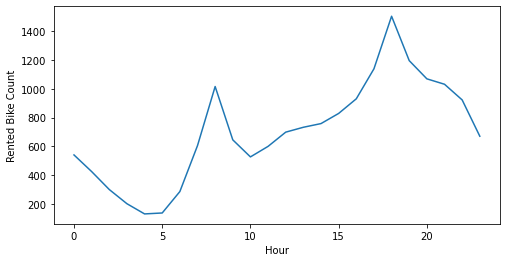

In [18]:
plt.figure(figsize = (8,4))
sns.lineplot(x=hour_avg['Hour'],y=hour_avg['Rented Bike Count'])

The timeseries graph on demand on a day shows a non linear curve. There are some peak periods. So treating hour as a numeric variable can lead to some problems in the model.

Keeping the peaks in mind, lets create some demand buckets.

#### We have defined some utility functions for conversions and reusability

#### Convert hour into  buckets -using utility functions

In [19]:
def convertHourBuckets(hour):
    hour = int(hour)
    if hour < 6:
        # low and decreasing
        return 'early_morning'
    elif hour < 9:
        return 'morning'
    elif hour < 16:
        return 'office_hours'
    elif hour < 20:
        return 'evening'    
    else:
        return 'night'

#### Convert a date into weekend and weekday

In [20]:

def convertDate2Day(date):
    if datetime.datetime.strptime(date, '%d/%m/%Y'):
        return datetime.datetime.strptime(date, '%d/%m/%Y').strftime('%A')
    elif datetime.datetime.strptime(date, '%d/%m/%Y'):
        return datetime.datetime.strptime(date, '%d/%m/%Y').strftime('%A')
# Convert a date in the format 12/09/2018 to weekday or weekend if weekend returns 1
# did not consider the middle east standard, as the data is from Korea
def convertDate2Weekend(date):
    day = convertDate2Day(date)
    if day in ["Sunday","Saturday"]:
        return 1
    return 0

In [21]:
#Convert the Hours into 5 buckets
bikeData['Hour_bkt'] = bikeData['Hour'].apply(lambda x : convertHourBuckets(x))

In [22]:
#bikeData['Date'] = bikeData['Date'].apply(lambda x : convertDate2Day(x))

In [23]:
#Convert the Hours into 4 buckets
bikeData['Weekend'] = bikeData['Date'].apply(lambda x : convertDate2Weekend(x))

In [24]:
bikeData.Hour_bkt.unique()

array(['early_morning', 'morning', 'office_hours', 'evening', 'night'],
      dtype=object)

## 1.4.2 n-1 dummy encoding

In [25]:
bikeCatData_enc = pd.get_dummies(bikeData[['Seasons','Hour_bkt','Functioning Day','Holiday']],'',drop_first=True)
bikeCatData_enc.rename(columns={'_Yes':'FunctionDay'},inplace=True)
bikeCatData_enc.head(2)

,_Spring,_Summer,_Winter,_evening,_morning,_night,_office_hours,FunctionDay,_No Holiday
0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,1,1


In [26]:
bikeData_num = bikeData.select_dtypes(include=[np.number])
#bikeData_num = bikeData_num.drop('Hour',axis = 1)

In [27]:
bikeData_feats = pd.concat([bikeData_num,bikeCatData_enc], axis=1)

In [28]:
bikeData_feats.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Weekend,_Spring,_Summer,_Winter,_evening,_morning,_night,_office_hours,FunctionDay,_No Holiday
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,0.284932,0.252055,0.252055,0.246575,0.166667,0.125000,0.166667,0.291667,0.966324,0.950685
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.451408,0.434217,0.434217,0.431042,0.372699,0.330738,0.372699,0.454556,0.180404,0.216537
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
bikeData.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Hour_bkt,Weekend
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,early_morning,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,early_morning,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,early_morning,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,early_morning,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,early_morning,0


#### Scaling all together

In [30]:
def standardScale_dataframe(data,name_suffix = "_std"):
    std_scale = StandardScaler()
    variables = []
    numeric_df = data.select_dtypes(include=[np.number])
    for param in numeric_df.columns:
        param_name = param.strip()+name_suffix
        variables.append(param_name)
        if param_name not in (numeric_df.columns):
            print(param_name)
            numeric_df[param_name] = std_scale.fit_transform(data[[param]]) # returns z-scores of the values of the attribute
    return numeric_df,variables


#### Model Performance logged into a dataframe for comparison

In [31]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    mape = np.abs((actual - predicted) / actual)
    mape = mape[~np.isnan(mape)]
    return ((mape) * 100).mean()

def model_metrics(result_df,model,name,remarks,datatype,y,y_hat):

    # calculate R-squared, Adjusted R-squared, MSE, RMSE, MAE and MAPE for full model
    # use 'rsquared' to calculate R-squared value
    # use 'rsquared_adj' to calculate Adjusted R-squared value
    # use 'mean_squared_error' to calculate MSE
    # use 'rmse' to calculate RMSE
    # use 'mean_absolute_error' to calculate MAE
    # use the defined function 'mape' to calculate MAPE
    residuals = model.resid

    MLR_full_model_metrics = pd.Series({'Model_Name': name,
                                        'Data_Type': datatype,
                                        'Remarks': remarks,
                                        'R-squared': model.rsquared,
                                        'Adj. R-squared': model.rsquared_adj,
                                        'Durbin_Watson':statsmodels.stats.stattools.durbin_watson(residuals, axis=0),
                                        'JB_Prob':statsmodels.stats.stattools.jarque_bera(residuals, axis=0)[1],
                                        'Condition_No': model.condition_number,
                                        'MSE': mean_squared_error(y, y_hat),
                                        'RMSE': np.sqrt(mean_squared_error(y, y_hat)),
                                        'MAE': mean_absolute_error(y, y_hat),
                                       })

    
    # append the values to the result table
    result_df = result_df[(result_df.Model_Name != name)]
    result_df = result_df.append(MLR_full_model_metrics, ignore_index = True)

    return result_df

#### Utility function which wraps repeatedly used stuff for LR Models

In [32]:
def lr_model_experiment(df,target,exp_name,remarks,result_df,test_size=0.3,random_state = 123):
    X = df
    X = sm.add_constant(X)
    X = X.drop(target,axis = 1)
    print(X.columns)
    Y = df[target]
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=test_size,random_state=random_state) 
    lin_reg_model = sm.OLS(y_train,x_train).fit()
    
    y_test_predict = lin_reg_model.predict(x_test)

    out_df = model_metrics(result_df,lin_reg_model,exp_name+'_Test',remarks,"Test",y_test,y_test_predict)
    
    y_train_predict = lin_reg_model.predict(x_train)

    out_df = model_metrics(out_df,lin_reg_model,exp_name+'_Train',remarks,"Train",y_train,y_train_predict)
    return out_df,lin_reg_model,len(x_train)

<a id="after"></a>
## 2 Model Performance after Transformation

Transformation is a process that can be used to change the scale of the original data to get more accurate results. 

The transformed data can be used to satisfy the assumptions of linear regression, which were not satisfied earlier with the original data.

#### First, we build the model using the original data.

In [33]:
# create a copy of our dataframe 'bikeData'
bikeData_cons = bikeData_feats.copy()

#### Split the data into training and test sets.

In [34]:
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = bikeData_cons.drop('Rented Bike Count', axis = 1)

# dependent variable
y = bikeData_cons['Rented Bike Count']

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

# check the dimensions of the train & test subset
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (7008, 20)
y_train (7008,)
X_test (1752, 20)
y_test (1752,)


**Build the multiple linear regression model using the OLS method.**

In [35]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     545.8
Date:                Sat, 18 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:29:01   Log-Likelihood:                -52097.
No. Observations:                7008   AIC:                         1.042e+05
Df Residuals:                    6988   BIC:                         1.044e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Check the Assumption of Autocorrelation

We can check the correlation between the residuals using the `Durbin-Watson` test. The value of the test statistic ranges from 0 to 4. The test statistic value near to 2, represents no autocorrelation. The value of the test statistic between 0 and 2 implies positive autocorrelation and the value between 2 and 4 implies negative autocorrelation.



**Interpretation:** From the above summary, we can observe that the value obtained from the `Durbin-Watson` test statistic is close to 2 (= 2.042). Thus, we conclude that there is no autocorrelation.

#### Check the Normality of Residuals

Check the normality of residuals before transforming the target variable

Skewness of the residuals:  0.7028038851271227


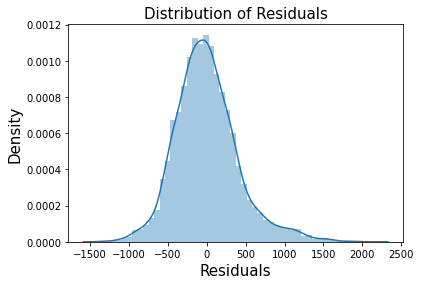

In [36]:
# plot a distplot for the residuals
sns.distplot(MLR_model.resid)

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", MLR_model.resid.skew())

#### Interpretation of coefficient of skewness
If the value of:<br>
skewness < 0 implies negative skewness<br>
skewness > 0 implies positive skewness<br>
skewness = 0 implies no skewness (perfect normal distribution)<br>

We can see that the distribution of the residuals is positively skewed. 

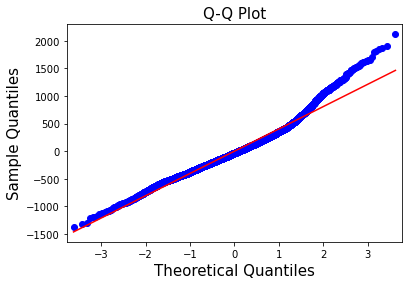

In [37]:
# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

**Interpretation** Here we can see that the residuals are not normally distributed. The value of skewness is 0.703. We will do Square-root transform on the target variable and see if this reduces the skewness.

**Build the multiple linear regression model using the OLS method after transforming the target variable.**

<a id="sqr"></a>
### 2.1 Square Root Transformation

This transformation is used to reduce the skewness in the data. We can transform the target and/or independent variables by taking its square root. 

Let us apply square root transformation on y_train. 

**Square Root Transformation**

In [38]:
# build a model on training dataset
# fit() is used to fit the OLS model
# use square root transformation of y_train 
MLR_model_after_transform = sm.OLS(np.sqrt(y_train), X_train).fit()

# print the summary output
print(MLR_model_after_transform.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     829.9
Date:                Sat, 18 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:29:01   Log-Likelihood:                -23485.
No. Observations:                7008   AIC:                         4.701e+04
Df Residuals:                    6988   BIC:                         4.715e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Interpretation** The value of R-Squared increases from 0.597 to 0.693 and the value of Adjusted R-Squared increases from 0.596 to 0.692. 

Check the normality of residuals after transforming the target variable

Skewness of the residuals:  0.0333132326804559


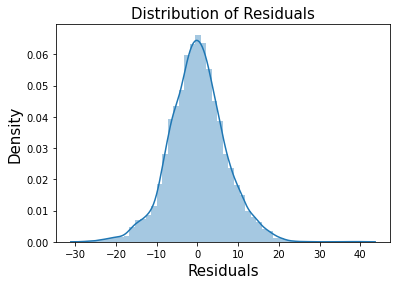

In [39]:
# plot a distplot for the residuals
sns.distplot(MLR_model_after_transform.resid)

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", MLR_model_after_transform.resid.skew())

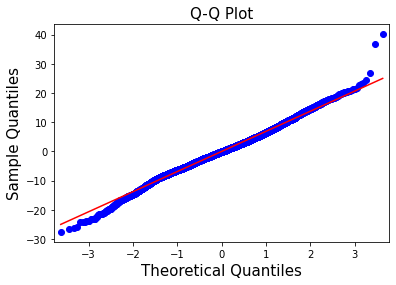

In [40]:
# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model_after_transform.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

In [41]:
stats.shapiro(MLR_model_after_transform.resid)


ShapiroResult(statistic=0.9942903518676758, pvalue=4.0841321443311595e-16)

After transforming the target variable, the skewness reduced to 0.0333 and we can see a near normal distribution of the residuals.

### 3. Multiple Linear Regression(MLR)

### 3.1.1 Understanding the Features Relations

<Figure size 1080x1080 with 0 Axes>

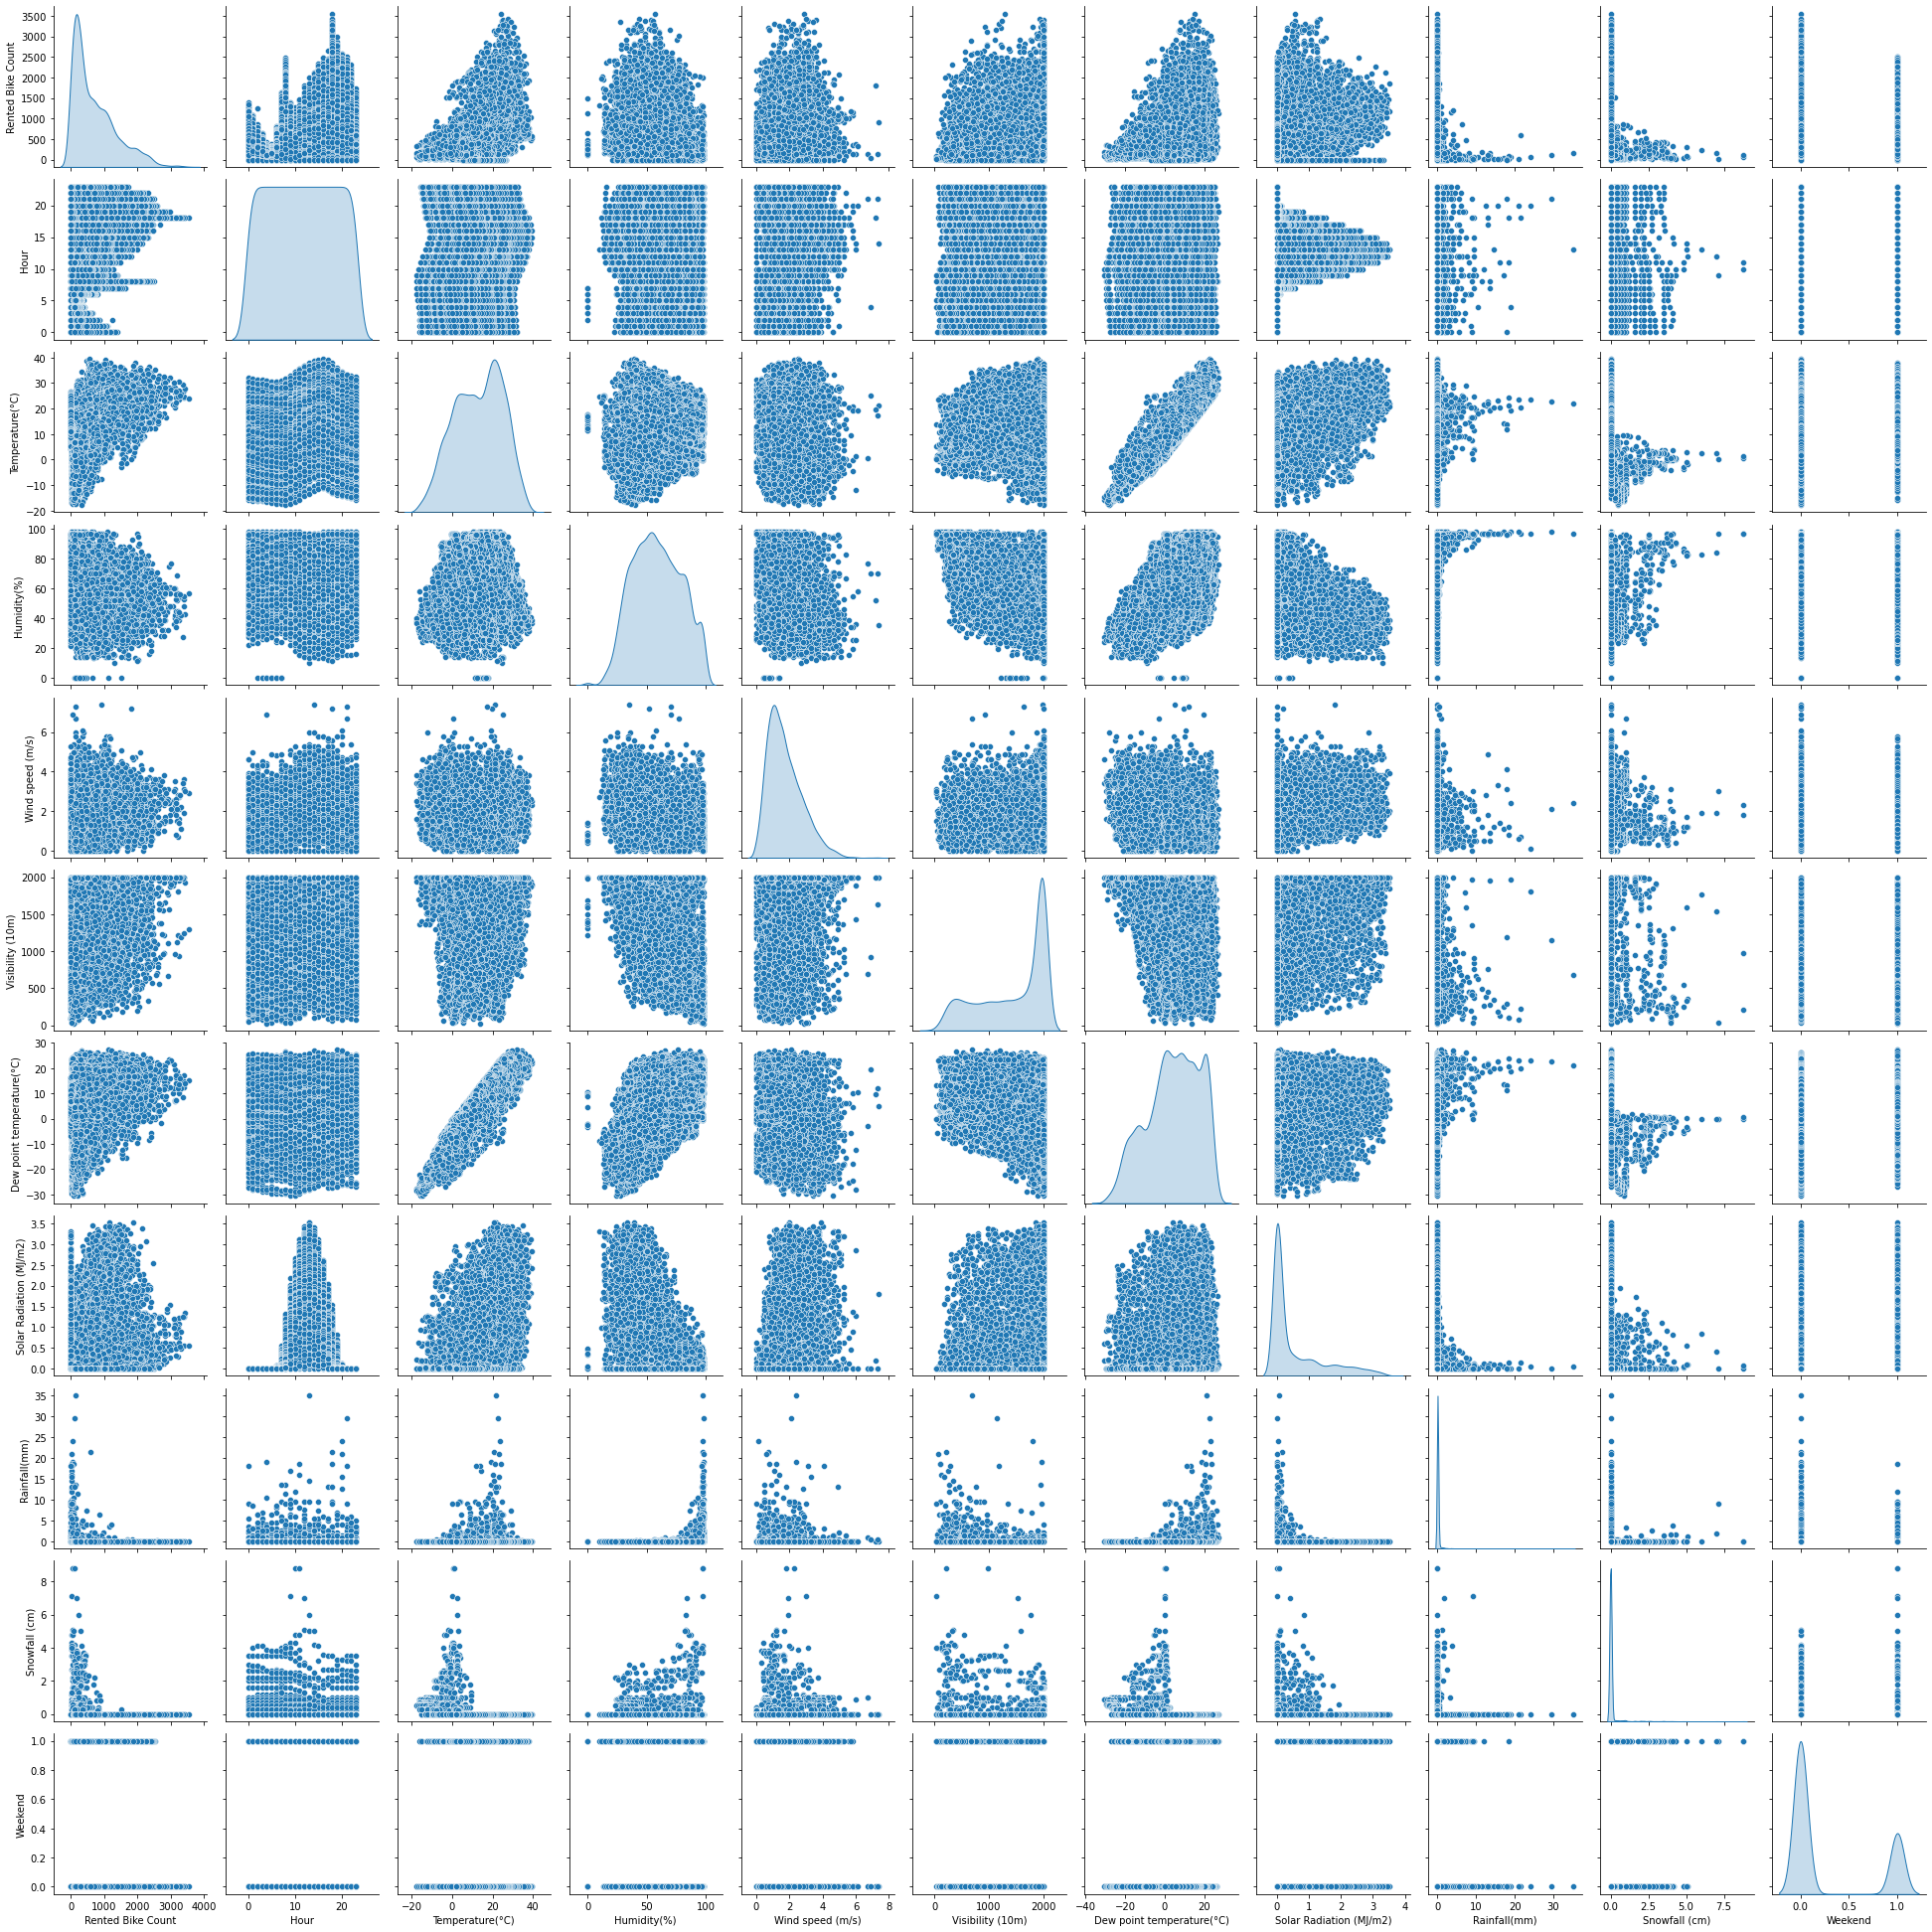

In [42]:
plt.figure(figsize=(15,15))
sns.pairplot(bikeData_num, diag_kind="kde")
#g.map_lower(sns.kdeplot, levels=4, color=".2")

**Observation1: some linearity is identified between Temperature and Dew point temperature**

In [43]:
corr = bikeData_feats.corr()

<AxesSubplot:>

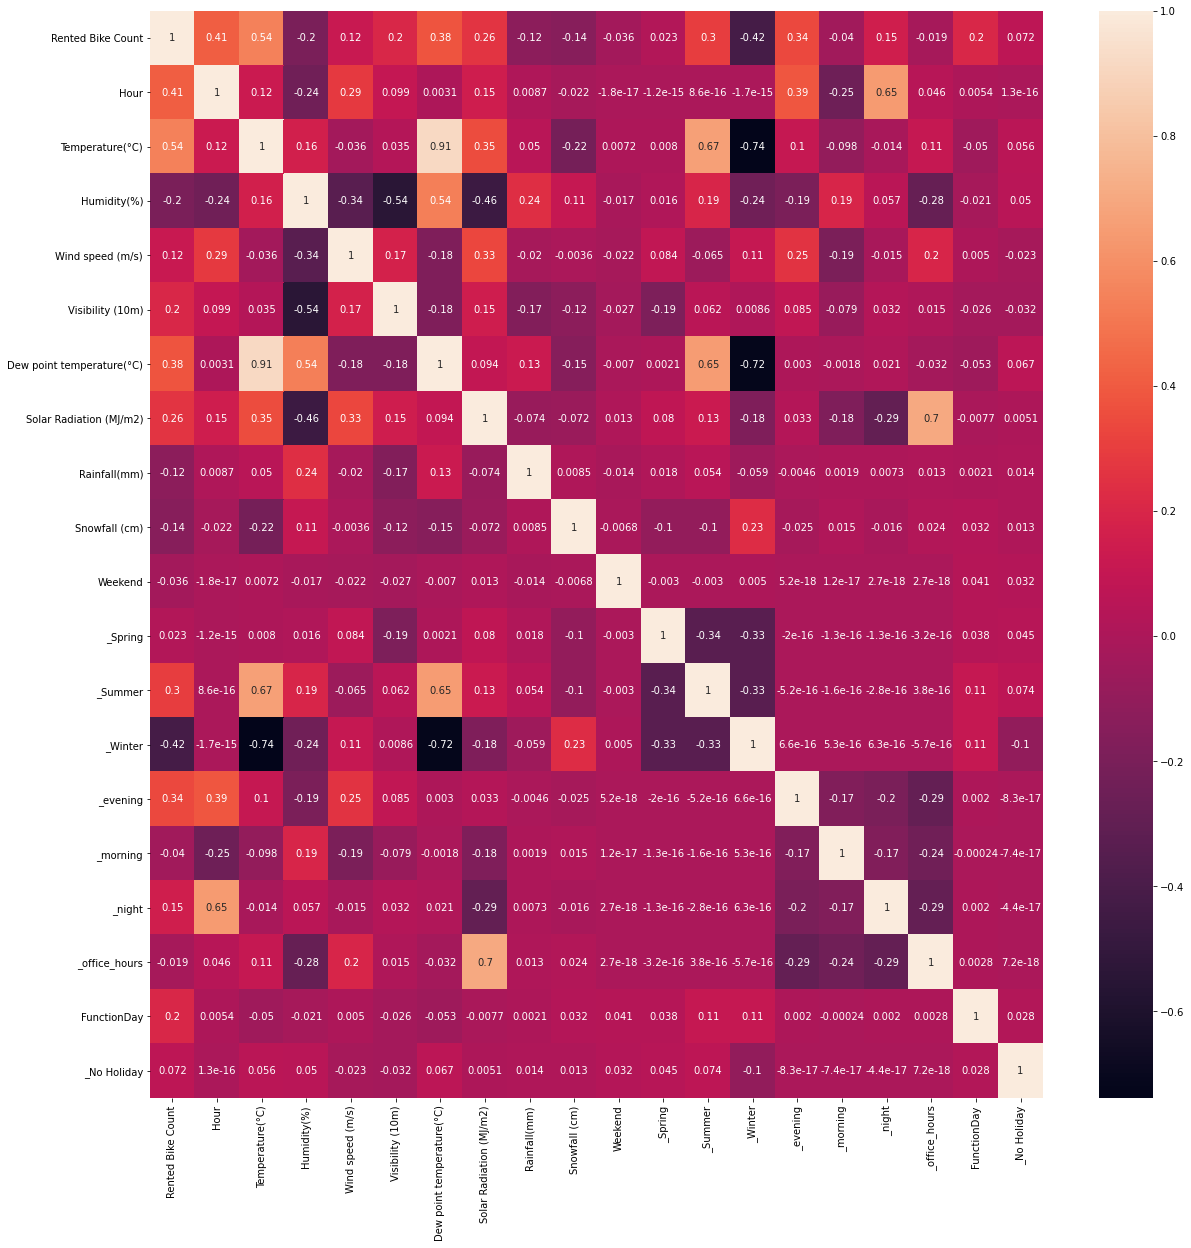

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

<AxesSubplot:>

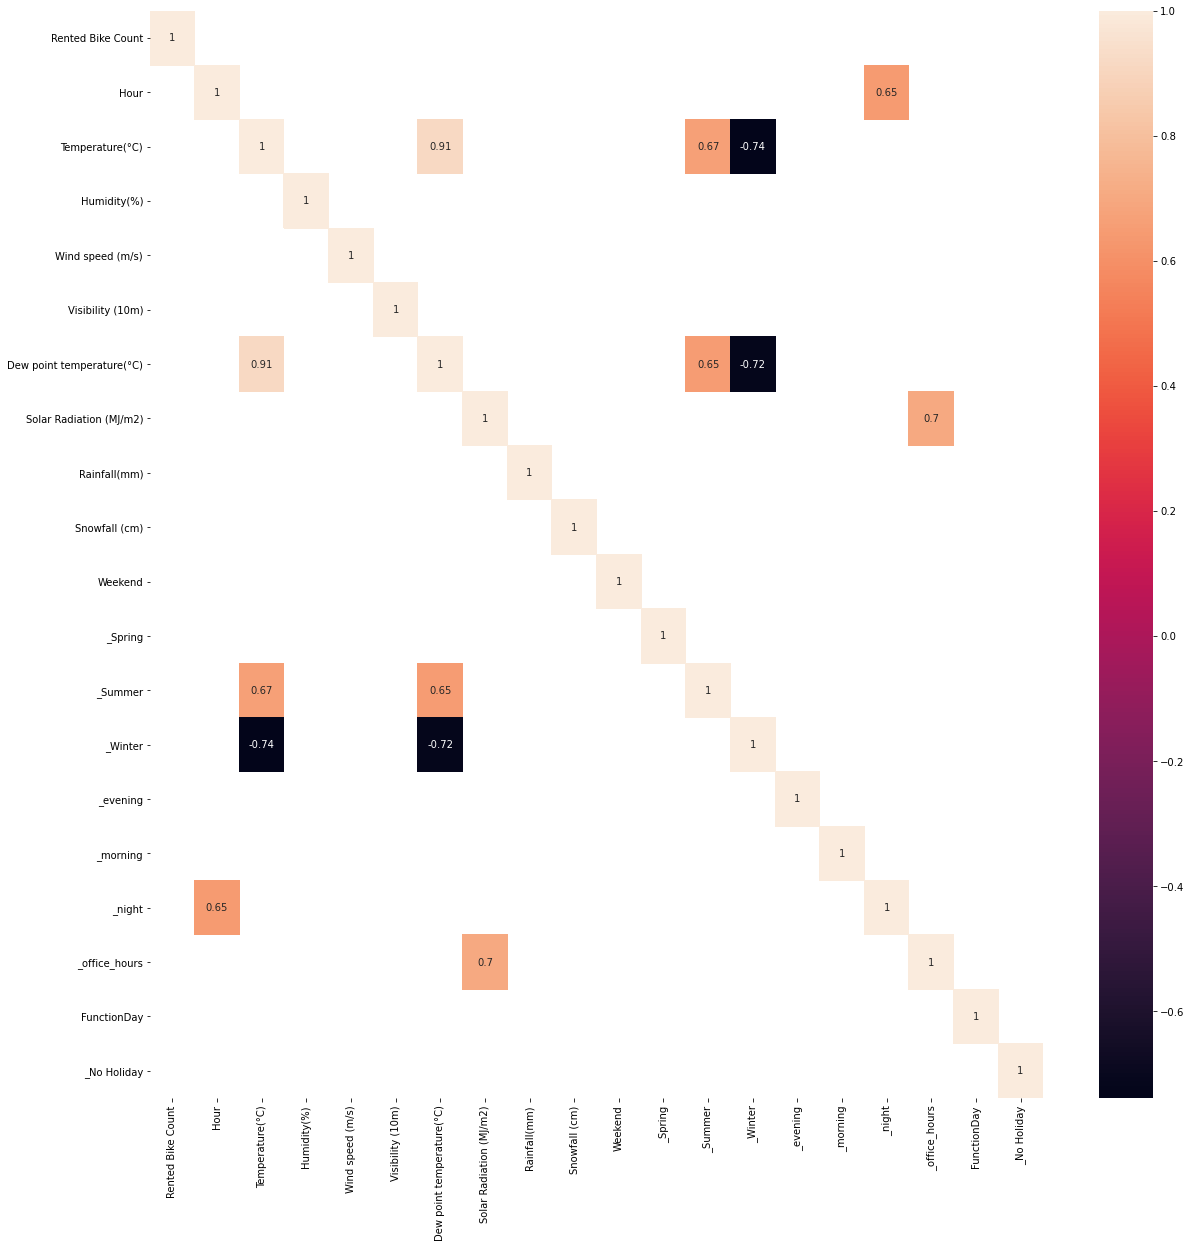

In [45]:
filter_corr = corr[np.abs(corr) > 0.6]
plt.figure(figsize=(20,20))
sns.heatmap(filter_corr, annot=True)

**Observation2: Significant linearity is identified between Temperature with Summer and Winter**

### 3.1.2 Backward Elimination

Backward elimination starts with all regressors in the model.  The F statistic is calculated as we remove regressors on at a time.  In this case, the feature with the smallest F statistic is removed from the model ands the procedure continues until the smallest partial F statistic is greater than the pre-selected cutoff value of F, and terminates otherwise.  This method sounds particularly appealing, when we’d like to see how each variable affects the model.

In [46]:
X = bikeData_feats
X = X.drop('Rented Bike Count',axis = 1)
Y = bikeData['Rented Bike Count']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 123) 

def backward_regression(X, y,
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop with p-value - ', worst_feature, '-', worst_pval)
        if not changed:
            break
    return included, model.summary()

In [47]:
included, summary = backward_regression(x_train, y_train)

Drop with p-value -  Hour - 0.26051211577065914
Drop with p-value -  Solar Radiation (MJ/m2) - 0.2310089068054951
Drop with p-value -  Visibility (10m) - 0.241595822517454


In [48]:
included

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Dew point temperature(°C)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Weekend',
 '_Spring',
 '_Summer',
 '_Winter',
 '_evening',
 '_morning',
 '_night',
 '_office_hours',
 'FunctionDay',
 '_No Holiday']

### 3.1.3 Forward Selection

Forward elimination starts with no features, and the insertion of features into the regression model one-by-one.  First, the regressor with the highest correlation is selected for inclusion, which coincidentally the regressor that produces the largest F-statistic value when testing the significance of the model.  This is called partial correlation because technically they represent the correlation coefficients between the model residuals with a specific variable and  the model residuals with the other regressors.  All subsequent regressors are selected the same way.  The procedure continues until the F statistic exceeds a pre-selected F-value (called F-to-enter) and terminates otherwise.

In [49]:
def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

In [50]:
forward_regression(x_train, y_train, 0.05)

['Temperature(°C)',
 'Hour',
 'FunctionDay',
 'Humidity(%)',
 '_office_hours',
 '_Winter',
 '_evening',
 '_morning',
 'Rainfall(mm)',
 '_night',
 '_Spring',
 '_Summer',
 'Weekend',
 '_No Holiday',
 'Dew point temperature(°C)',
 'Snowfall (cm)',
 'Wind speed (m/s)']

### 3.1.4 Recursive Feature Elimination

RFE selects features by considering a smaller and smaller set of regressors.  The starting point is the original set of regressors. Less important regressors are recursively pruned from the initial set.  The procedure is repeated until a desired set of features remain.  That number can either be a priori specified, or can be found using cross validation. In fact, RFE offers a variant – RFECV – designed to optimally find the best subset of regressors.

In [51]:
#RECURSIVE FEATURE ELIMINATION
#Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
X = x_train
y = y_train
names=pd.DataFrame(x_train.columns)

#use linear regression as the model
lin_reg = LinearRegression()

#This is to select 5 variables: can be changed and checked in model for accuracy
rfe_mod = RFE(lin_reg, 5, step=1) #RFECV(lin_reg, step=1, cv=5) 
myvalues=rfe_mod.fit(X,y) #to fit
myvalues.support_#The mask of selected features.
myvalues.ranking_ #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
rankings

,0
0,14
1,13
2,11
3,12
4,15
5,10
6,3
7,8
8,9
9,5


In [52]:
#Concat and name columns
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

#Select most important (Only 1's)
most_important = ranked.loc[ranked['Rank'] ==1] 
print(most_important)

most_important['Rank'].count()

        Feature  Rank
10      _Spring     1
12      _Winter     1
13     _evening     1
15       _night     1
17  FunctionDay     1


5

### 3.1.5 Variance Inflation Factor

In [53]:
X = bikeData_feats
X = X.drop('Rented Bike Count',axis = 1)

# filter the numerical features in the dataset
bikeData_numeric_features_vif = X.select_dtypes(include=[np.number])

# display the first five observations
bikeData_numeric_features_vif.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Weekend,_Spring,_Summer,_Winter,_evening,_morning,_night,_office_hours,FunctionDay,_No Holiday
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1,1


In [54]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(bikeData_numeric_features_vif.values, i) for i in range(bikeData_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = bikeData_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,76.881180,Hour
1,53.575662,Temperature(°C)
2,34.947755,Dew point temperature(°C)
3,30.522541,FunctionDay
4,30.060965,Humidity(%)
5,27.237594,_night
6,19.917759,_No Holiday
7,17.456185,_evening
8,14.646453,_office_hours
9,9.947474,Visibility (10m)


In [55]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(bikeData_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(bikeData_numeric_features_vif.values, i) for i in range(bikeData_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = bikeData_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        bikeData_numeric_features_vif = bikeData_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                   Features
0     9.979114                Humidity(%)
1     5.070919           Wind speed (m/s)
2     5.504477           Visibility (10m)
3     6.572943  Dew point temperature(°C)
4     4.545835    Solar Radiation (MJ/m2)
5     1.092030               Rainfall(mm)
6     1.138521              Snowfall (cm)
7     1.385769                    Weekend
8     2.095287                    _Spring
9     3.179347                    _Summer
10    4.290300                    _Winter
11    1.973136                   _evening
12    1.510067                   _morning
13    1.654656                     _night
14    4.426169              _office_hours


### 3.2 Model Building

In [56]:
Model_Features = list(bikeData_feats.columns)
Model_Features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Weekend',
 '_Spring',
 '_Summer',
 '_Winter',
 '_evening',
 '_morning',
 '_night',
 '_office_hours',
 'FunctionDay',
 '_No Holiday']

In [57]:
Target_Variable = ['Rented Bike Count']

**Make a result dataframe**

In [58]:
#Model Parameters to be compared in each experiments
cols = ['Model_Name','Data_Type','Remarks', 
        'R-squared','Adj. R-squared', 
        'Durbin_Watson', 'JB_Prob', 'Condition_No',
        'MSE', 'RMSE', 'MAE']
# creating a empty dataframe of the colums
result_table_e3_set = pd.DataFrame(columns = cols)

In [59]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats,Target_Variable,"BIKE_LR_ALL_E31",
                                                              "All variables, no tranformation,\
                                                               no scaling, only categorical encoding",
                                                               result_table_e3_set,0.3,123)


Index(['const', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Weekend',
       '_Spring', '_Summer', '_Winter', '_evening', '_morning', '_night',
       '_office_hours', 'FunctionDay', '_No Holiday'],
      dtype='object')


In [60]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     477.5
Date:                Sat, 18 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:29:23   Log-Likelihood:                -45622.
No. Observations:                6132   AIC:                         9.128e+04
Df Residuals:                    6112   BIC:                         9.142e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -12.4231    114.496     -0.109      0.914    -236.875     212.029
Hour                         -3.8710      3.440     -1.125      0.261     -10.615       2.873
Temperature(°C)              11.2744      4.310      2.616      0.009       2.826      19.723
Humidity(%)                 -10.9241      1.194     -9.149      0.000     -13.265      -8.583
Wind speed (m/s)             10.9147      5.985      1.824      0.068      -0.818      22.647
Visibility (10m)              0.0142      0.011      1.253      0.210      -0.008       0.036
Dew point temperature(°C)    14.8610      4.481      3.317      0.001       6.077      23.645
Solar Radiation (MJ/m2)      14.9117     11.985      1.244      0.213      -8.582      38.406
Rainfall(mm)                -52.5905      4.614    -11.399      0.000     -61.635     -43.546
Snowfall (cm)                29.2823     13.035      2.246      0.025       3.728      54.836
Weekend                     -82.8513     11.740     -7.057      0.000    -105.866     -59.837
_Spring                    -152.5882     15.884     -9.606      0.000    -183.727    -121.449
_Summer                    -163.9038     19.674     -8.331      0.000    -202.472    -125.336
_Winter                    -355.9074     22.568    -15.771      0.000    -400.148    -311.667
_evening                    693.5443     53.948     12.856      0.000     587.787     799.302
_morning                    367.5376     23.988     15.322      0.000     320.513     414.562
_night                      604.8691     67.365      8.979      0.000     472.809     736.929
_office_hours               168.4215     37.469      4.495      0.000      94.969     241.874
FunctionDay                 941.1423     30.901     30.457      0.000     880.566    1001.719
_No Holiday                 129.2747     24.597      5.256      0.000      81.056     177.493
==============================================================================
Omnibus:                      678.582   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1220.210
Skew:                           0.745   Prob(JB):                    1.08e-265
Kurtosis:                       4.598   Cond. No.                     3.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
result_table_e3_set.tail()

,Model_Name,Data_Type,Remarks,R-squared,Adj. R-squared,Durbin_Watson,JB_Prob,Condition_No,MSE,RMSE,MAE
0,BIKE_LR_ALL_E31_Test,Test,"All variables, no tranformation, ...",0.597506,0.596254,2.02301,1.083288e-265,33978.113374,163841.693774,404.773633,311.850464
1,BIKE_LR_ALL_E31_Train,Train,"All variables, no tranformation, ...",0.597506,0.596254,2.02301,1.083288e-265,33978.113374,169737.350888,411.991931,308.797194


### 3.3 Model Evaluation

#### 3.3.1 Determinant of correlaton Matrix

Let D be the determinant of correlation matrix. \
Then 0 < D < 1\
D=0 High multicollinearity\
D=1 No multicollinearit

A square matrix is singular, that is, its determinant is zero, if it contains rows or columns which are proportionally interrelated; in other words, one or more of its rows (columns) is exactly expressible as a linear combination of all or some other its rows (/columns).

If the predictors are nearly collenear, estimates (coefficients, R-square etc.) are very unreliable. And in contrast, with predictors far from collinear, estimates are reliable because the space spanned by the predictors is robust to those sampling fluctuations of data.

In [62]:
bikeData_feats_noTarget = bikeData_feats.drop(Target_Variable,axis=1)
np.linalg.det(bikeData_feats_noTarget.corr())

2.1650769445812497e-06

THere exists some level of Correlation as the determinant is close to zero

#### 3.3.2 Condition Number

CN > 1000 Severe multicollinearity\
100 < CN < 1000 Moderate multicollinearity\
100 < CN No multicollinearity

Large condition number ||A|| ||inv(A)||, is ill-conditioned and small errors are amplified.

In non-mathematical terms, an ill-conditioned problem is one where, for a small change in the inputs (the independent variables) there is a large change in the dependent variable. This means that the correct solution/answer to the equation becomes hard to find. The condition number is a property of the problem. 

In [63]:
print("Condition Number is very High = ",lr_model.condition_number)

Condition Number is very High =  33978.113373631924


#### Experiment 2

Reduce some features which are shown as linear from the heatmap. We have chosen the variables whihc show correlation more than 0.6

In [64]:
bikeData_feats_e32 = bikeData_feats.drop(['_Summer', '_Winter','Dew point temperature(°C)'],axis=1)

In [65]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e32,Target_Variable,"BIKE_LR_ALL_E32",
                                                              "Base = BIKE_LR_ALL_E32,\
                                                               Removed high correlations",
                                                               result_table_e3_set,0.3,123)

Index(['const', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Weekend', '_Spring', '_evening', '_morning', '_night',
       '_office_hours', 'FunctionDay', '_No Holiday'],
      dtype='object')


In [66]:
result_table_e3_set.tail()

,Model_Name,Data_Type,Remarks,R-squared,Adj. R-squared,Durbin_Watson,JB_Prob,Condition_No,MSE,RMSE,MAE
0,BIKE_LR_ALL_E31_Test,Test,"All variables, no tranformation, ...",0.597506,0.596254,2.023010,1.083288e-265,33978.113374,163841.693774,404.773633,311.850464
1,BIKE_LR_ALL_E31_Train,Train,"All variables, no tranformation, ...",0.597506,0.596254,2.023010,1.083288e-265,33978.113374,169737.350888,411.991931,308.797194
2,BIKE_LR_ALL_E32_Test,Test,"Base = BIKE_LR_ALL_E32, ...",0.572561,0.571442,2.016956,2.527486e-224,27505.889001,175010.106861,418.342093,321.746175
3,BIKE_LR_ALL_E32_Train,Train,"Base = BIKE_LR_ALL_E32, ...",0.572561,0.571442,2.016956,2.527486e-224,27505.889001,180256.982643,424.566818,317.950913


<AxesSubplot:>

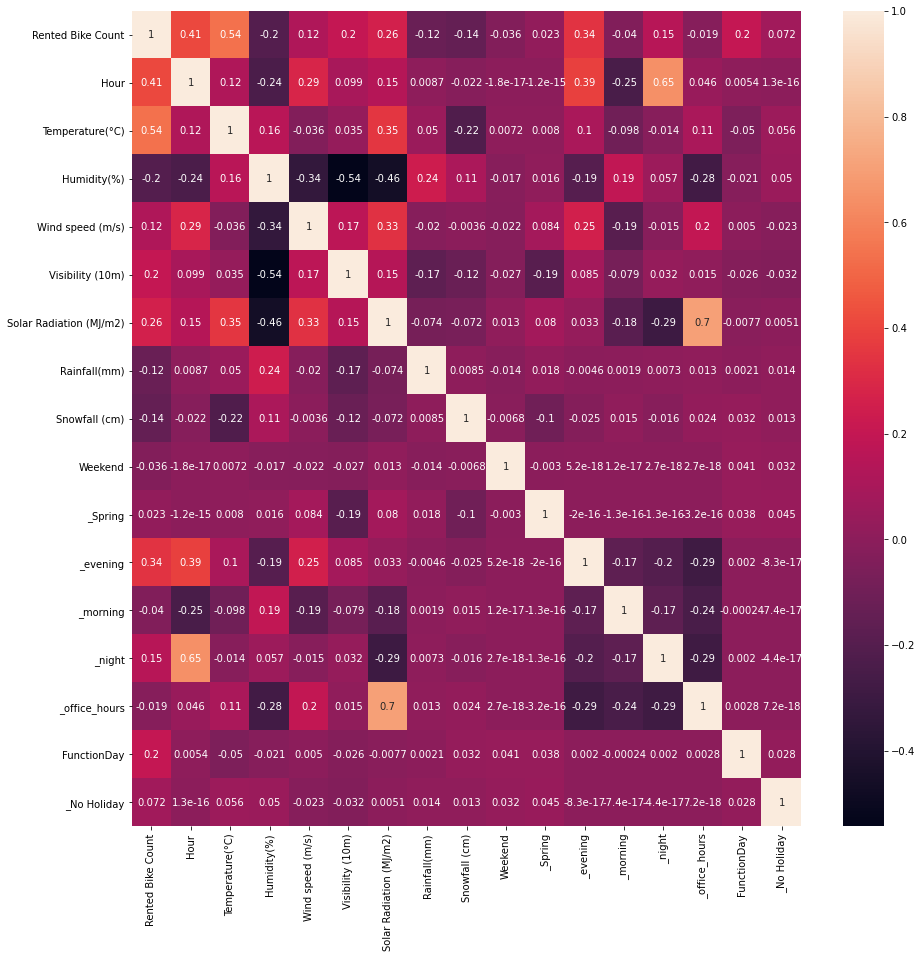

In [67]:
plt.figure(figsize=(15,15))
sns.heatmap(bikeData_feats_e32.corr(),annot=True)

#### Experiment 3

Reduce some more  features which are showing linearity near to 0.5

In [68]:
bikeData_feats_e33 = bikeData_feats.drop(['_Summer', '_Winter',\
                                          'Dew point temperature(°C)',\
                                          'Humidity(%)','_night'],axis=1)

In [69]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e32,Target_Variable,"BIKE_LR_ALL_E33",
                                                              "Removed correlation near to |0.5|,\
                                                               base BIKE_LR_ALL_E32",
                                                               result_table_e3_set,0.3,123)

Index(['const', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Weekend', '_Spring', '_evening', '_morning', '_night',
       '_office_hours', 'FunctionDay', '_No Holiday'],
      dtype='object')


In [70]:
result_table_e3_set.tail()

,Model_Name,Data_Type,Remarks,R-squared,Adj. R-squared,Durbin_Watson,JB_Prob,Condition_No,MSE,RMSE,MAE
1,BIKE_LR_ALL_E31_Train,Train,"All variables, no tranformation, ...",0.597506,0.596254,2.023010,1.083288e-265,33978.113374,169737.350888,411.991931,308.797194
2,BIKE_LR_ALL_E32_Test,Test,"Base = BIKE_LR_ALL_E32, ...",0.572561,0.571442,2.016956,2.527486e-224,27505.889001,175010.106861,418.342093,321.746175
3,BIKE_LR_ALL_E32_Train,Train,"Base = BIKE_LR_ALL_E32, ...",0.572561,0.571442,2.016956,2.527486e-224,27505.889001,180256.982643,424.566818,317.950913
4,BIKE_LR_ALL_E33_Test,Test,"Removed correlation near to |0.5|, ...",0.572561,0.571442,2.016956,2.527486e-224,27505.889001,175010.106861,418.342093,321.746175
5,BIKE_LR_ALL_E33_Train,Train,"Removed correlation near to |0.5|, ...",0.572561,0.571442,2.016956,2.527486e-224,27505.889001,180256.982643,424.566818,317.950913


***Observation: No Improvement has been observed from Experiment 32***

#### Experiment 4

Trial to check after transforming the data,  Scale the Data through Z Transform

In [71]:
bikeData_feats_e34,var_names = standardScale_dataframe(bikeData_feats)

Rented Bike Count_std
Hour_std
Temperature(°C)_std
Humidity(%)_std
Wind speed (m/s)_std
Visibility (10m)_std
Dew point temperature(°C)_std
Solar Radiation (MJ/m2)_std
Rainfall(mm)_std
Snowfall (cm)_std
Weekend_std
_Spring_std
_Summer_std
_Winter_std
_evening_std
_morning_std
_night_std
_office_hours_std
FunctionDay_std
_No Holiday_std


In [72]:
bikeData_feats_e34_std = bikeData_feats_e34[var_names]


In [73]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e34_std,['Rented Bike Count_std'],"BIKE_LR_ALL_E34",
                                                              "input and output variable scaled",
                                                               result_table_e3_set,0.3,123)

Index(['const', 'Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Dew point temperature(°C)_std', 'Solar Radiation (MJ/m2)_std',
       'Rainfall(mm)_std', 'Snowfall (cm)_std', 'Weekend_std', '_Spring_std',
       '_Summer_std', '_Winter_std', '_evening_std', '_morning_std',
       '_night_std', '_office_hours_std', 'FunctionDay_std',
       '_No Holiday_std'],
      dtype='object')


In [74]:
result_table_e3_set.tail()

,Model_Name,Data_Type,Remarks,R-squared,Adj. R-squared,Durbin_Watson,JB_Prob,Condition_No,MSE,RMSE,MAE
3,BIKE_LR_ALL_E32_Train,Train,"Base = BIKE_LR_ALL_E32, ...",0.572561,0.571442,2.016956,2.527486e-224,27505.889001,180256.982643,424.566818,317.950913
4,BIKE_LR_ALL_E33_Test,Test,"Removed correlation near to |0.5|, ...",0.572561,0.571442,2.016956,2.527486e-224,27505.889001,175010.106861,418.342093,321.746175
5,BIKE_LR_ALL_E33_Train,Train,"Removed correlation near to |0.5|, ...",0.572561,0.571442,2.016956,2.527486e-224,27505.889001,180256.982643,424.566818,317.950913
6,BIKE_LR_ALL_E34_Test,Test,input and output variable scaled,0.597506,0.596254,2.023010,1.083288e-265,27.853776,0.393875,0.627594,0.483519
7,BIKE_LR_ALL_E34_Train,Train,input and output variable scaled,0.597506,0.596254,2.023010,1.083288e-265,27.853776,0.408048,0.638786,0.478785


In [75]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Rented Bike Count_std   R-squared:                       0.598
Model:                               OLS   Adj. R-squared:                  0.596
Method:                    Least Squares   F-statistic:                     477.5
Date:                   Sat, 18 Sep 2021   Prob (F-statistic):               0.00
Time:                           09:29:26   Log-Likelihood:                -5952.7
No. Observations:                   6132   AIC:                         1.195e+04
Df Residuals:                       6112   BIC:                         1.208e+04
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0046      0.008      0.563      0.573      -0.011       0.021
Hour_std                         -0.0415      0.037     -1.125      0.261      -0.114       0.031
Temperature(°C)_std               0.2088      0.080      2.616      0.009       0.052       0.365
Humidity(%)_std                  -0.3449      0.038     -9.149      0.000      -0.419      -0.271
Wind speed (m/s)_std              0.0175      0.010      1.824      0.068      -0.001       0.036
Visibility (10m)_std              0.0134      0.011      1.253      0.210      -0.008       0.034
Dew point temperature(°C)_std     0.3009      0.091      3.317      0.001       0.123       0.479
Solar Radiation (MJ/m2)_std       0.0201      0.016      1.244      0.213      -0.012       0.052
Rainfall(mm)_std                 -0.0920      0.008    -11.399      0.000      -0.108      -0.076
Snowfall (cm)_std                 0.0198      0.009      2.246      0.025       0.003       0.037
Weekend_std                      -0.0580      0.008     -7.057      0.000      -0.074      -0.042
_Spring_std                      -0.1027      0.011     -9.606      0.000      -0.124      -0.082
_Summer_std                      -0.1103      0.013     -8.331      0.000      -0.136      -0.084
_Winter_std                      -0.2378      0.015    -15.771      0.000      -0.267      -0.208
_evening_std                      0.4008      0.031     12.856      0.000       0.340       0.462
_morning_std                      0.1885      0.012     15.322      0.000       0.164       0.213
_night_std                        0.3495      0.039      8.979      0.000       0.273       0.426
_office_hours_std                 0.1187      0.026      4.495      0.000       0.067       0.170
FunctionDay_std                   0.2632      0.009     30.457      0.000       0.246       0.280
_No Holiday_std                   0.0434      0.008      5.256      0.000       0.027       0.060
==============================================================================
Omnibus:                      678.582   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1220.210
Skew:                           0.745   Prob(JB):                    1.08e-265
Kurtosis:                       4.598   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***The Conditions Number has been reduced after the scaling of the data***

In [76]:
print("Condition Number is now normal after the scale transformations = ",lr_model.condition_number)

Condition Number is now normal after the scale transformations =  27.853776138781768


RMSE was largely reduced as the target variable is scaled, so this experiment did not do any magic to reduce the error but the scaling.

#### Experiment 5

No Scaling is done on Target Variable, to keep it comparable and to make the results clearly explainable.

In [77]:
bikeData_feats_e35_std = bikeData_feats_e34[var_names]
bikeData_feats_e35_std.drop('Rented Bike Count_std', axis=1, inplace=True)
bikeData_feats_e35_std = pd.concat([bikeData_feats_e35_std,bikeData['Rented Bike Count']],axis=1)

bikeData_feats_e35_std.head(3)

,Hour_std,Temperature(°C)_std,Humidity(%)_std,Wind speed (m/s)_std,Visibility (10m)_std,Dew point temperature(°C)_std,Solar Radiation (MJ/m2)_std,Rainfall(mm)_std,Snowfall (cm)_std,Weekend_std,_Spring_std,_Summer_std,_Winter_std,_evening_std,_morning_std,_night_std,_office_hours_std,FunctionDay_std,_No Holiday_std,Rented Bike Count
0,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,-0.631243,-0.580514,-0.580514,1.748015,-0.447214,-0.377964,-0.447214,-0.641689,0.18668,0.227757,254
1,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,-0.631243,-0.580514,-0.580514,1.748015,-0.447214,-0.377964,-0.447214,-0.641689,0.18668,0.227757,204
2,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,-0.631243,-0.580514,-0.580514,1.748015,-0.447214,-0.377964,-0.447214,-0.641689,0.18668,0.227757,173


In [78]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e35_std,
                                                              ['Rented Bike Count'],"BIKE_LR_ALL_E35",
                                                              "input and output variable scaled",
                                                               result_table_e3_set,0.3,123)

Index(['const', 'Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Dew point temperature(°C)_std', 'Solar Radiation (MJ/m2)_std',
       'Rainfall(mm)_std', 'Snowfall (cm)_std', 'Weekend_std', '_Spring_std',
       '_Summer_std', '_Winter_std', '_evening_std', '_morning_std',
       '_night_std', '_office_hours_std', 'FunctionDay_std',
       '_No Holiday_std'],
      dtype='object')


In [79]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     477.5
Date:                Sat, 18 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:29:26   Log-Likelihood:                -45622.
No. Observations:                6132   AIC:                         9.128e+04
Df Residuals:                    6112   BIC:                         9.142e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           707.5715      5.271    134.233      0.000     697.238     717.905
Hour_std                        -26.7959     23.812     -1.125      0.261     -73.477      19.885
Temperature(°C)_std             134.6636     51.476      2.616      0.009      33.752     235.575
Humidity(%)_std                -222.4286     24.311     -9.149      0.000    -270.087    -174.770
Wind speed (m/s)_std             11.3103      6.202      1.824      0.068      -0.847      23.468
Visibility (10m)_std              8.6461      6.900      1.253      0.210      -4.879      22.172
Dew point temperature(°C)_std   194.0787     58.517      3.317      0.001      79.365     308.792
Solar Radiation (MJ/m2)_std      12.9538     10.411      1.244      0.213      -7.455      33.363
Rainfall(mm)_std                -59.3289      5.205    -11.399      0.000     -69.532     -49.126
Snowfall (cm)_std                12.7882      5.693      2.246      0.025       1.628      23.948
Weekend_std                     -37.3976      5.299     -7.057      0.000     -47.786     -27.009
_Spring_std                     -66.2526      6.897     -9.606      0.000     -79.773     -52.732
_Summer_std                     -71.1658      8.542     -8.331      0.000     -87.912     -54.420
_Winter_std                    -153.4022      9.727    -15.771      0.000    -172.471    -134.334
_evening_std                    258.4687     20.105     12.856      0.000     219.055     297.882
_morning_std                    121.5517      7.933     15.322      0.000     106.000     137.104
_night_std                      225.4214     25.106      8.979      0.000     176.206     274.637
_office_hours_std                76.5526     17.031      4.495      0.000      43.166     109.939
FunctionDay_std                 169.7758      5.574     30.457      0.000     158.848     180.703
_No Holiday_std                  27.9912      5.326      5.256      0.000      17.551      38.432
==============================================================================
Omnibus:                      678.582   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1220.210
Skew:                           0.745   Prob(JB):                    1.08e-265
Kurtosis:                       4.598   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
result_table_e3_set.tail(20)

,Model_Name,Data_Type,Remarks,R-squared,Adj. R-squared,Durbin_Watson,JB_Prob,Condition_No,MSE,RMSE,MAE
0,BIKE_LR_ALL_E31_Test,Test,"All variables, no tranformation, ...",0.597506,0.596254,2.023010,1.083288e-265,33978.113374,163841.693774,404.773633,311.850464
1,BIKE_LR_ALL_E31_Train,Train,"All variables, no tranformation, ...",0.597506,0.596254,2.023010,1.083288e-265,33978.113374,169737.350888,411.991931,308.797194
2,BIKE_LR_ALL_E32_Test,Test,"Base = BIKE_LR_ALL_E32, ...",0.572561,0.571442,2.016956,2.527486e-224,27505.889001,175010.106861,418.342093,321.746175
3,BIKE_LR_ALL_E32_Train,Train,"Base = BIKE_LR_ALL_E32, ...",0.572561,0.571442,2.016956,2.527486e-224,27505.889001,180256.982643,424.566818,317.950913
4,BIKE_LR_ALL_E33_Test,Test,"Removed correlation near to |0.5|, ...",0.572561,0.571442,2.016956,2.527486e-224,27505.889001,175010.106861,418.342093,321.746175
5,BIKE_LR_ALL_E33_Train,Train,"Removed correlation near to |0.5|, ...",0.572561,0.571442,2.016956,2.527486e-224,27505.889001,180256.982643,424.566818,317.950913
6,BIKE_LR_ALL_E34_Test,Test,input and output variable scaled,0.597506,0.596254,2.023010,1.083288e-265,27.853776,0.393875,0.627594,0.483519
7,BIKE_LR_ALL_E34_Train,Train,input and output variable scaled,0.597506,0.596254,2.023010,1.083288e-265,27.853776,0.408048,0.638786,0.478785
8,BIKE_LR_ALL_E35_Test,Test,input and output variable scaled,0.597506,0.596254,2.023010,1.083288e-265,27.853776,163841.693774,404.773633,311.850464
9,BIKE_LR_ALL_E35_Train,Train,input and output variable scaled,0.597506,0.596254,2.023010,1.083288e-265,27.853776,169737.350888,411.991931,308.797194


#### 3.3.3 Existence of linear relationship

The independent variables must have a linear relationship with the dependent variable.

The residuals are a measure of the fit of your model to the data. In other words, it describes the variability around each point in the relationship dependent variable to the independent variables for each point in the plot. If the points show no particular pattern in their distance from the regression line the you have a pretty good model. if the residuals are generally no more than about 2 units from the line if they are bigger then the variable does not explain enough.

In [81]:
import math

def plot_residual_linearity(residual,predictors,figsize=(10,6)):
    N = len(predictors.columns)
    rows = math.ceil(N/3)
    if rows == 0:
        return
    
    fig, axs = plt.subplots(rows,3, figsize=figsize)
    fig.subplots_adjust(hspace = .2, wspace=.2)

    axs = axs.ravel()
    
    i = 0
    for pred in predictors.columns:
        sns.scatterplot(x = predictors[pred],y=residual,ax=axs[i] )
        i +=1
        

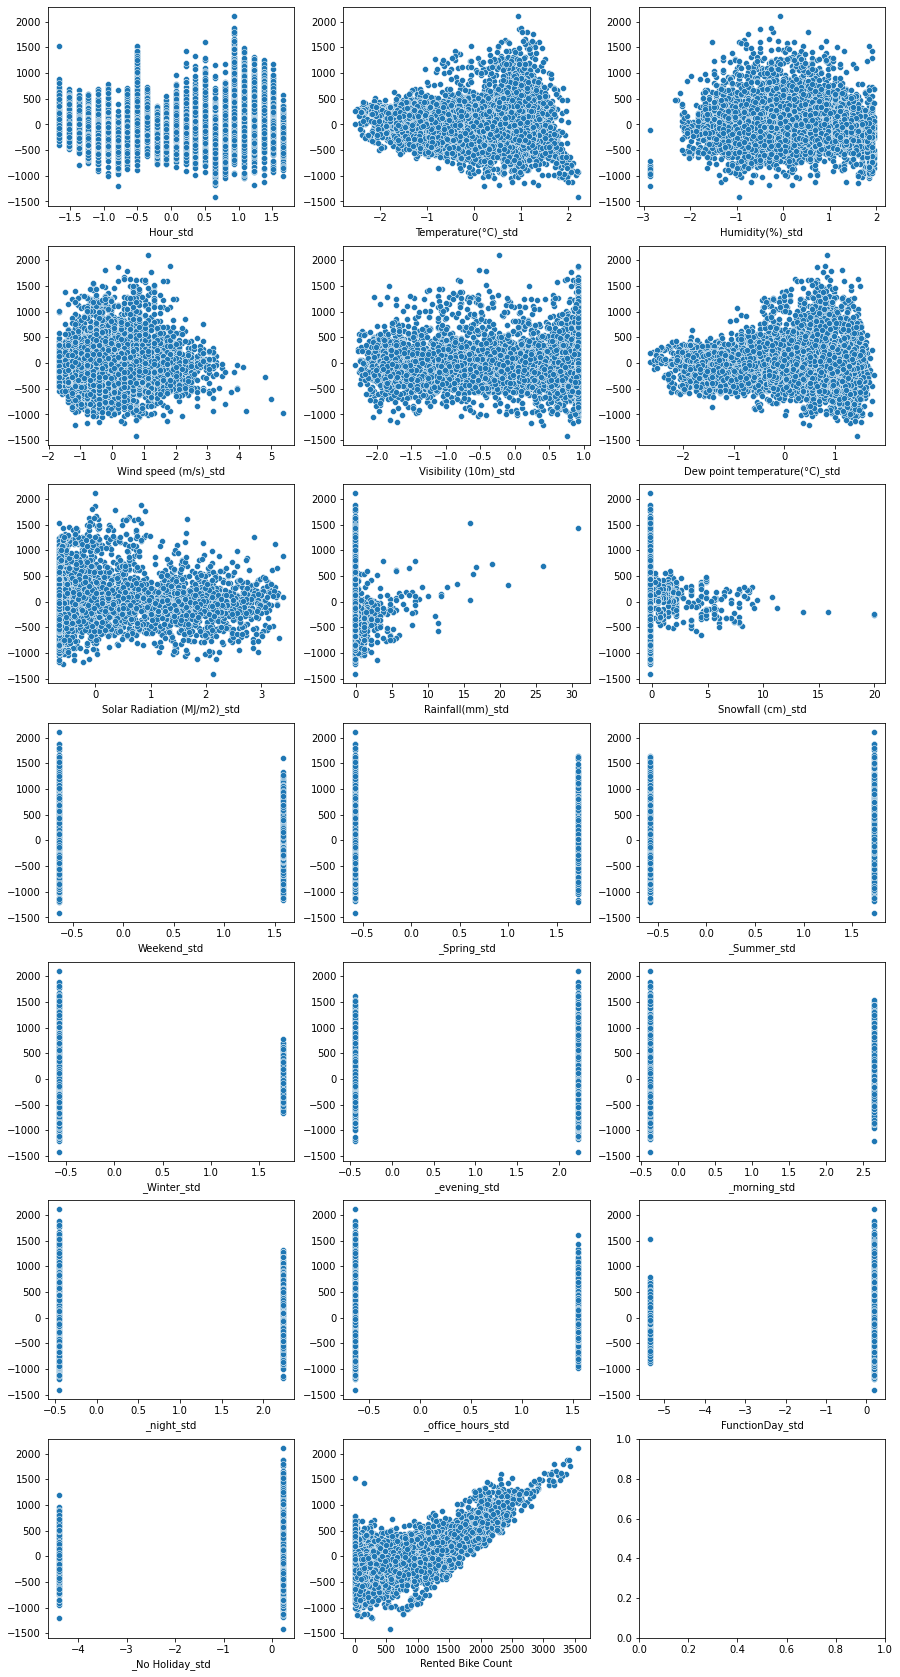

In [82]:

plot_residual_linearity(lr_model.resid,bikeData_feats_e35_std,figsize=(15, 30))

***Observation: There is no specific pattern observed between predictors and residuals***

A scatter plot depicting no pattern indicates that the variable has a linear relationship with the response variable. 

we see a random pattern in all the plots of independent. Hence, we may say that, the predictors are linearly related with the response variable.

However, RainFall and SnowFall are suspecious candidates as they express an unusual pattern and the residuals scattered beyond 2 units.

Relation is seen only with the target variable as it was present in the input dataframe.

#### 3.3.4 Assumption of autocorrelation


Assumption of autocorrelation is violated when residuals are correlated within 
themselves, i.e. they are serially correlated

To test whether the error terms are autocorrelated,we do Durbin-Watson test

In [83]:
statsmodels.stats.stattools.durbin_watson(lr_model.resid, axis=0)

2.0230100622424048

If the value is near to 2, then there is No autocorrelation or self correlation inside the residuals.

#### 3.3.5 Homoscedasticity assumption

Variance of the residual is assumed to be independent of the explanatory variables.

In [84]:
lm,lmpval,fval,f_pval = statsmodels.stats.diagnostic.het_breuschpagan(lr_model.resid,lr_model.model.exog)
print(lmpval)

8.224898319181726e-223


***Observation: As per the test, the error terms are heteroskedastic***

 Heteroscedasticity: non-constant variance of residuals.  It happens due to the presence of extreme values.

#### Experiment 6

Trying to reduce residual linearity problem by removing RainFall and SnowFall.

In [85]:
bikeData.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Hour_bkt', 'Weekend'],
      dtype='object')

In [86]:
bikeData_feats_e35_std.columns

Index(['Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Dew point temperature(°C)_std', 'Solar Radiation (MJ/m2)_std',
       'Rainfall(mm)_std', 'Snowfall (cm)_std', 'Weekend_std', '_Spring_std',
       '_Summer_std', '_Winter_std', '_evening_std', '_morning_std',
       '_night_std', '_office_hours_std', 'FunctionDay_std', '_No Holiday_std',
       'Rented Bike Count'],
      dtype='object')

In [87]:
bikeData_feats_e36_std = bikeData_feats_e35_std[['Hour_std','Humidity(%)_std', 'Temperature(°C)_std','Wind speed (m/s)_std',
                                                 'Dew point temperature(°C)_std',
                                                 'Visibility (10m)_std', 'Solar Radiation (MJ/m2)_std', 
                                                 'Weekend_std', '_Spring_std', 
                                                 '_morning_std', '_night_std', 'FunctionDay_std', '_No Holiday_std',
                                                 'Rented Bike Count']]
#sns.pairplot(bikeData_feats_e36_std)

In [88]:
bikeData_feats_e35_std.columns

Index(['Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Dew point temperature(°C)_std', 'Solar Radiation (MJ/m2)_std',
       'Rainfall(mm)_std', 'Snowfall (cm)_std', 'Weekend_std', '_Spring_std',
       '_Summer_std', '_Winter_std', '_evening_std', '_morning_std',
       '_night_std', '_office_hours_std', 'FunctionDay_std', '_No Holiday_std',
       'Rented Bike Count'],
      dtype='object')

In [89]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e36_std,
                                                              ['Rented Bike Count'],"BIKE_LR_STD_RED_E36",
                                                              "residual relationship\
                                                               reduced few variables",
                                                               result_table_e3_set,0.3,123)

result_table_e3_set.tail()

Index(['const', 'Hour_std', 'Humidity(%)_std', 'Temperature(°C)_std',
       'Wind speed (m/s)_std', 'Dew point temperature(°C)_std',
       'Visibility (10m)_std', 'Solar Radiation (MJ/m2)_std', 'Weekend_std',
       '_Spring_std', '_morning_std', '_night_std', 'FunctionDay_std',
       '_No Holiday_std'],
      dtype='object')


,Model_Name,Data_Type,Remarks,R-squared,Adj. R-squared,Durbin_Watson,JB_Prob,Condition_No,MSE,RMSE,MAE
7,BIKE_LR_ALL_E34_Train,Train,input and output variable scaled,0.597506,0.596254,2.023010,1.083288e-265,27.853776,0.408048,0.638786,0.478785
8,BIKE_LR_ALL_E35_Test,Test,input and output variable scaled,0.597506,0.596254,2.023010,1.083288e-265,27.853776,163841.693774,404.773633,311.850464
9,BIKE_LR_ALL_E35_Train,Train,input and output variable scaled,0.597506,0.596254,2.023010,1.083288e-265,27.853776,169737.350888,411.991931,308.797194
10,BIKE_LR_STD_RED_E36_Test,Test,residual relationship ...,0.538378,0.537398,2.009701,5.942111e-211,23.519373,188522.931907,434.192275,337.059602
11,BIKE_LR_STD_RED_E36_Train,Train,residual relationship ...,0.538378,0.537398,2.009701,5.942111e-211,23.519373,194672.078764,441.216589,335.493834


##### Experiment 7

Variance Inflation Factor (VIF): 

VIF = 1/(1-R^2)

Where R2
is obtained by regressing a predictor variable over all the other predictors in the model.

In [90]:

bikeData_feats_e37_std = bikeData_feats_e35_std.copy()
bikeData_feats_e37_std = bikeData_feats_e37_std.drop('Rented Bike Count', axis=1)
for i in range(len(bikeData_feats_e37_std.columns)):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(bikeData_feats_e37_std.values,i) for i in range(bikeData_feats_e37_std.shape[1])]
    vif['Features'] = bikeData_feats_e37_std.columns
    vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)
    
    multi = vif[vif.VIF_Factor > 10]
    
    if (multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor',ascending = False)
        bikeData_feats_e37_std = bikeData_feats_e37_std.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)
        break;


    VIF_Factor                     Features
0     1.335908                     Hour_std
1     5.298687          Temperature(°C)_std
2     2.726153              Humidity(%)_std
3     1.357576         Wind speed (m/s)_std
4     1.705724         Visibility (10m)_std
5     3.709572  Solar Radiation (MJ/m2)_std
6     1.082121             Rainfall(mm)_std
7     1.115892            Snowfall (cm)_std
8     1.006999                  Weekend_std
9     1.718260                  _Spring_std
10    2.636956                  _Summer_std
11    3.400353                  _Winter_std
12    1.629545                 _evening_std
13    1.205783                 _morning_std
14    2.914123            _office_hours_std
15    1.082482              FunctionDay_std
16    1.024980              _No Holiday_std


In [91]:
# Fit the Model and store the results
bikeData_feats_e37_std = pd.concat([bikeData_feats_e37_std,bikeData['Rented Bike Count']],axis=1)
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e37_std,
                                                              ['Rented Bike Count'],"BIKE_LR_STD_VIF_E37",
                                                              "after VIF treatment",
                                                               result_table_e3_set,0.3,123)

result_table_e3_set.tail()

Index(['const', 'Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Solar Radiation (MJ/m2)_std', 'Rainfall(mm)_std', 'Snowfall (cm)_std',
       'Weekend_std', '_Spring_std', '_Summer_std', '_Winter_std',
       '_evening_std', '_morning_std', '_office_hours_std', 'FunctionDay_std',
       '_No Holiday_std'],
      dtype='object')


,Model_Name,Data_Type,Remarks,R-squared,Adj. R-squared,Durbin_Watson,JB_Prob,Condition_No,MSE,RMSE,MAE
9,BIKE_LR_ALL_E35_Train,Train,input and output variable scaled,0.597506,0.596254,2.023010,1.083288e-265,27.853776,169737.350888,411.991931,308.797194
10,BIKE_LR_STD_RED_E36_Test,Test,residual relationship ...,0.538378,0.537398,2.009701,5.942111e-211,23.519373,188522.931907,434.192275,337.059602
11,BIKE_LR_STD_RED_E36_Train,Train,residual relationship ...,0.538378,0.537398,2.009701,5.942111e-211,23.519373,194672.078764,441.216589,335.493834
12,BIKE_LR_STD_VIF_E37_Test,Test,after VIF treatment,0.591142,0.590005,2.020755,6.223218e-219,4.870427,167754.919594,409.578954,318.990340
13,BIKE_LR_STD_VIF_E37_Train,Train,after VIF treatment,0.591142,0.590005,2.020755,6.223218e-219,4.870427,172420.977154,415.236050,315.672531


#### 3.3.6 The error terms must follow normal distribution


<AxesSubplot:ylabel='Density'>

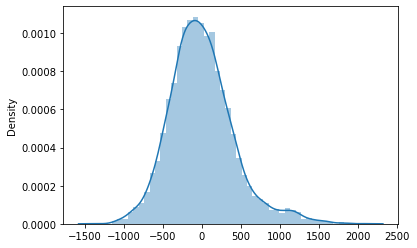

In [92]:
residuals = lr_model.resid
sns.distplot(residuals,kde=True)

In [93]:
JB,JBpv,skew,kurt =sm.stats.stattools.jarque_bera(residuals,axis=0)
JBpv

6.223217710834953e-219

In [94]:

X = bikeData_feats_e37_std
X = sm.add_constant(X)
Y = bikeData_orig['Rented Bike Count']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 123) 
lin_reg_model = sm.OLS(y_train,x_train).fit()
lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.353e+32
Date:                Sat, 18 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:29:29   Log-Likelihood:             1.6334e+05
No. Observations:                6132   AIC:                        -3.266e+05
Df Residuals:                    6113   BIC:                        -3.265e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        6.501e-13   1.65e-14     39.360      0.000    6.18e-13    6.83e-13
Hour_std                    -2.904e-13   1.04e-14    -28.019      0.000   -3.11e-13    -2.7e-13
Temperature(°C)_std          -6.75e-14   2.02e-14     -3.340      0.001   -1.07e-13   -2.79e-14
Humidity(%)_std              1.066e-13   1.42e-14      7.496      0.000    7.87e-14    1.34e-13
Wind speed (m/s)_std         1.217e-13   9.84e-15     12.371      0.000    1.02e-13    1.41e-13
Visibility (10m)_std         1.066e-14   1.09e-14      0.975      0.329   -1.08e-14    3.21e-14
Solar Radiation (MJ/m2)_std   6.75e-14   1.61e-14      4.183      0.000    3.59e-14    9.91e-14
Rainfall(mm)_std            -8.051e-14   8.29e-15     -9.714      0.000   -9.68e-14   -6.43e-14
Snowfall (cm)_std           -5.507e-14   9.01e-15     -6.114      0.000   -7.27e-14   -3.74e-14
Weekend_std                  6.128e-14   8.41e-15      7.283      0.000    4.48e-14    7.78e-14
_Spring_std                  2.052e-13    1.1e-14     18.632      0.000    1.84e-13    2.27e-13
_Summer_std                  1.599e-13   1.36e-14     11.775      0.000    1.33e-13    1.86e-13
_Winter_std                 -1.243e-14   1.57e-14     -0.790      0.429   -4.33e-14    1.84e-14
_evening_std                  1.03e-13   1.08e-14      9.533      0.000    8.18e-14    1.24e-13
_morning_std                -5.596e-14   9.31e-15     -6.009      0.000   -7.42e-14   -3.77e-14
_office_hours_std            2.096e-13   1.43e-14     14.678      0.000    1.82e-13    2.38e-13
FunctionDay_std              -1.51e-14   9.48e-15     -1.593      0.111   -3.37e-14    3.48e-15
_No Holiday_std              -2.22e-16   8.46e-15     -0.026      0.979   -1.68e-14    1.64e-14
Rented Bike Count               1.0000   2.01e-17   4.97e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      241.623   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.061
Skew:                           0.467   Prob(JB):                     5.01e-55
Kurtosis:                       2.672   Cond. No.                     2.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Experiment 8

Remove the insignificant variables identified from the model statistics

In [95]:
bikeData_feats_e38_std = bikeData_feats_e37_std.drop(['Solar Radiation (MJ/m2)_std','Visibility (10m)_std','Wind speed (m/s)_std'],axis=1)

In [96]:
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e38_std,
                                                              ['Rented Bike Count'],"BIKE_LR_STD_VIF_E38",
                                                              "after VIF treatment, removed insignificant",
                                                               result_table_e3_set,0.3,123)

result_table_e3_set.tail()

Index(['const', 'Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Rainfall(mm)_std', 'Snowfall (cm)_std', 'Weekend_std', '_Spring_std',
       '_Summer_std', '_Winter_std', '_evening_std', '_morning_std',
       '_office_hours_std', 'FunctionDay_std', '_No Holiday_std'],
      dtype='object')


,Model_Name,Data_Type,Remarks,R-squared,Adj. R-squared,Durbin_Watson,JB_Prob,Condition_No,MSE,RMSE,MAE
11,BIKE_LR_STD_RED_E36_Train,Train,residual relationship ...,0.538378,0.537398,2.009701,5.942111e-211,23.519373,194672.078764,441.216589,335.493834
12,BIKE_LR_STD_VIF_E37_Test,Test,after VIF treatment,0.591142,0.590005,2.020755,6.223218e-219,4.870427,167754.919594,409.578954,318.990340
13,BIKE_LR_STD_VIF_E37_Train,Train,after VIF treatment,0.591142,0.590005,2.020755,6.223218e-219,4.870427,172420.977154,415.236050,315.672531
14,BIKE_LR_STD_VIF_E38_Test,Test,"after VIF treatment, removed insignificant",0.590766,0.589830,2.020015,2.744078e-221,4.268395,167607.017356,409.398360,318.907936
15,BIKE_LR_STD_VIF_E38_Train,Train,"after VIF treatment, removed insignificant",0.590766,0.589830,2.020015,2.744078e-221,4.268395,172579.429291,415.426804,316.012265


In [97]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     630.7
Date:                Sat, 18 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:29:30   Log-Likelihood:                -45673.
No. Observations:                6132   AIC:                         9.138e+04
Df Residuals:                    6117   BIC:                         9.148e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 707.6140      5.313    133.188      0.000     697.199     718.029
Hour_std              181.0691      6.075     29.803      0.000     169.159     192.979
Temperature(°C)_std   298.1737     11.496     25.937      0.000     275.637     320.710
Humidity(%)_std      -156.2957      6.471    -24.152      0.000    -168.982    -143.610
Rainfall(mm)_std      -61.4485      5.197    -11.824      0.000     -71.636     -51.261
Snowfall (cm)_std      11.3811      5.710      1.993      0.046       0.187      22.575
Weekend_std           -39.3237      5.316     -7.397      0.000     -49.745     -28.903
_Spring_std           -66.7938      6.634    -10.069      0.000     -79.798     -53.790
_Summer_std           -65.3408      8.544     -7.647      0.000     -82.090     -48.591
_Winter_std          -156.2766      9.610    -16.262      0.000    -175.115    -137.438
_evening_std           87.4922      6.518     13.423      0.000      74.714     100.270
_morning_std           72.1996      5.761     12.533      0.000      60.907      83.493
_office_hours_std     -53.0726      6.465     -8.209      0.000     -65.747     -40.398
FunctionDay_std       169.5462      5.616     30.191      0.000     158.537     180.555
_No Holiday_std        27.2335      5.366      5.075      0.000      16.715      37.752
==============================================================================
Omnibus:                      617.734   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1015.724
Skew:                           0.722   Prob(JB):                    2.74e-221
Kurtosis:                       4.374   Cond. No.                         4.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

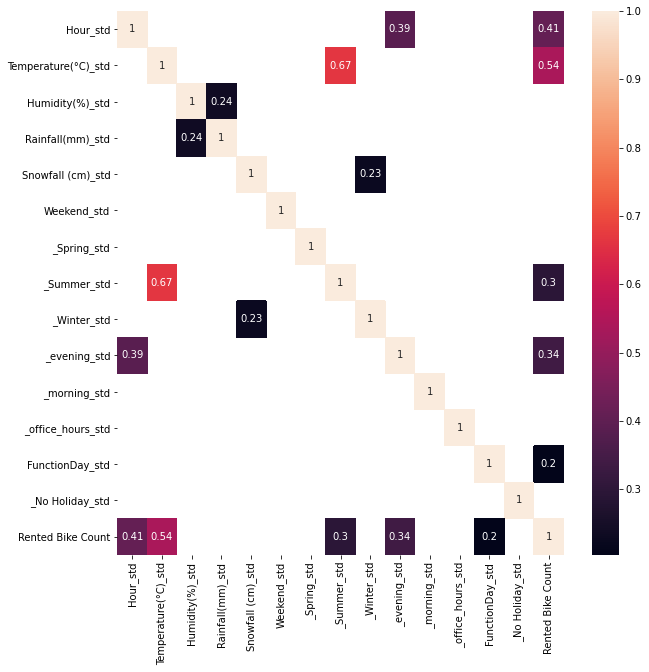

In [98]:
corr = bikeData_feats_e38_std.corr()
corr= corr[corr>0.2]
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot = True)

#### Experiment 9

In [99]:
bikeData_feats_e39_std = bikeData_feats_e37_std.drop(['_Summer_std'],axis=1)

In [100]:
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e39_std,
                                                              ['Rented Bike Count'],"BIKE_LR_STD_VIF_E39",
                                                              "after VIF treatment, removed insignificant\
                                                              removed collenear variable > 0.6",
                                                               result_table_e3_set,0.3,123)
result_table_e3_set.tail()

Index(['const', 'Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Solar Radiation (MJ/m2)_std', 'Rainfall(mm)_std', 'Snowfall (cm)_std',
       'Weekend_std', '_Spring_std', '_Winter_std', '_evening_std',
       '_morning_std', '_office_hours_std', 'FunctionDay_std',
       '_No Holiday_std'],
      dtype='object')


,Model_Name,Data_Type,Remarks,R-squared,Adj. R-squared,Durbin_Watson,JB_Prob,Condition_No,MSE,RMSE,MAE
13,BIKE_LR_STD_VIF_E37_Train,Train,after VIF treatment,0.591142,0.590005,2.020755,6.223218e-219,4.870427,172420.977154,415.236050,315.672531
14,BIKE_LR_STD_VIF_E38_Test,Test,"after VIF treatment, removed insignificant",0.590766,0.589830,2.020015,2.744078e-221,4.268395,167607.017356,409.398360,318.907936
15,BIKE_LR_STD_VIF_E38_Train,Train,"after VIF treatment, removed insignificant",0.590766,0.589830,2.020015,2.744078e-221,4.268395,172579.429291,415.426804,316.012265
16,BIKE_LR_STD_VIF_E39_Test,Test,"after VIF treatment, removed insignificant ...",0.587045,0.585965,2.022372,2.915678e-194,4.458116,169327.894586,411.494708,320.922297
17,BIKE_LR_STD_VIF_E39_Train,Train,"after VIF treatment, removed insignificant ...",0.587045,0.585965,2.022372,2.915678e-194,4.458116,174148.648314,417.311213,317.624008


In [101]:
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e37_std,
                                                              ['Rented Bike Count'],"BIKE_LR_STD_VIF_E37",
                                                              "Best Model Till Now\
                                                              ",
                                                               result_table_e3_set,0.3,123)
result_table_e3_set.tail()

Index(['const', 'Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Solar Radiation (MJ/m2)_std', 'Rainfall(mm)_std', 'Snowfall (cm)_std',
       'Weekend_std', '_Spring_std', '_Summer_std', '_Winter_std',
       '_evening_std', '_morning_std', '_office_hours_std', 'FunctionDay_std',
       '_No Holiday_std'],
      dtype='object')


,Model_Name,Data_Type,Remarks,R-squared,Adj. R-squared,Durbin_Watson,JB_Prob,Condition_No,MSE,RMSE,MAE
13,BIKE_LR_STD_VIF_E38_Train,Train,"after VIF treatment, removed insignificant",0.590766,0.589830,2.020015,2.744078e-221,4.268395,172579.429291,415.426804,316.012265
14,BIKE_LR_STD_VIF_E39_Test,Test,"after VIF treatment, removed insignificant ...",0.587045,0.585965,2.022372,2.915678e-194,4.458116,169327.894586,411.494708,320.922297
15,BIKE_LR_STD_VIF_E39_Train,Train,"after VIF treatment, removed insignificant ...",0.587045,0.585965,2.022372,2.915678e-194,4.458116,174148.648314,417.311213,317.624008
16,BIKE_LR_STD_VIF_E37_Test,Test,Best Model Till Now ...,0.591142,0.590005,2.020755,6.223218e-219,4.870427,167754.919594,409.578954,318.990340
17,BIKE_LR_STD_VIF_E37_Train,Train,Best Model Till Now ...,0.591142,0.590005,2.020755,6.223218e-219,4.870427,172420.977154,415.236050,315.672531


#### Experiment 10

In [102]:
bikeData_feats_e310_std = bikeData_feats_e37_std.copy()

bikeData_feats_e310_std['Rented_Bike_Count_sqrt'] = np.sqrt(bikeData_feats_e310_std['Rented Bike Count'])
bikeData_feats_e310_std = bikeData_feats_e310_std.drop('Rented Bike Count',axis=1)

In [103]:
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e310_std,
                                                              ['Rented_Bike_Count_sqrt'],"BIKE_LR_STD_VIF_E310",
                                                              "target variables transormed",
                                                               result_table_e3_set,0.3,123)
result_table_e3_set.tail()

Index(['const', 'Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Solar Radiation (MJ/m2)_std', 'Rainfall(mm)_std', 'Snowfall (cm)_std',
       'Weekend_std', '_Spring_std', '_Summer_std', '_Winter_std',
       '_evening_std', '_morning_std', '_office_hours_std', 'FunctionDay_std',
       '_No Holiday_std'],
      dtype='object')


,Model_Name,Data_Type,Remarks,R-squared,Adj. R-squared,Durbin_Watson,JB_Prob,Condition_No,MSE,RMSE,MAE
15,BIKE_LR_STD_VIF_E39_Train,Train,"after VIF treatment, removed insignificant ...",0.587045,0.585965,2.022372,2.915678e-194,4.458116,174148.648314,417.311213,317.624008
16,BIKE_LR_STD_VIF_E37_Test,Test,Best Model Till Now ...,0.591142,0.590005,2.020755,6.223218e-219,4.870427,167754.919594,409.578954,318.990340
17,BIKE_LR_STD_VIF_E37_Train,Train,Best Model Till Now ...,0.591142,0.590005,2.020755,6.223218e-219,4.870427,172420.977154,415.236050,315.672531
18,BIKE_LR_STD_VIF_E310_Test,Test,target variables transormed,0.675992,0.675091,2.022922,4.898075e-17,4.870427,47.994337,6.927794,5.500338
19,BIKE_LR_STD_VIF_E310_Train,Train,target variables transormed,0.675992,0.675091,2.022922,4.898075e-17,4.870427,50.484882,7.105271,5.539774


### 3.4 Best Model

In [104]:
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e37_std,
                                                              ['Rented Bike Count'],"BIKE_LR_BEST2",
                                                              "target variables transormed",
                                                               result_table_e3_set,0.3,123)
result_table_e3_set.tail(2)

Index(['const', 'Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Solar Radiation (MJ/m2)_std', 'Rainfall(mm)_std', 'Snowfall (cm)_std',
       'Weekend_std', '_Spring_std', '_Summer_std', '_Winter_std',
       '_evening_std', '_morning_std', '_office_hours_std', 'FunctionDay_std',
       '_No Holiday_std'],
      dtype='object')


,Model_Name,Data_Type,Remarks,R-squared,Adj. R-squared,Durbin_Watson,JB_Prob,Condition_No,MSE,RMSE,MAE
20,BIKE_LR_BEST2_Test,Test,target variables transormed,0.591142,0.590005,2.020755,6.223218e-219,4.870427,167754.919594,409.578954,318.990340
21,BIKE_LR_BEST2_Train,Train,target variables transormed,0.591142,0.590005,2.020755,6.223218e-219,4.870427,172420.977154,415.236050,315.672531


In [105]:
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e310_std,
                                                              ['Rented_Bike_Count_sqrt'],"BIKE_LR_BEST",
                                                              "Best Model Till Now\
                                                              ",
                                                               result_table_e3_set,0.3,123)
result_table_e3_set.tail(4)

Index(['const', 'Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Solar Radiation (MJ/m2)_std', 'Rainfall(mm)_std', 'Snowfall (cm)_std',
       'Weekend_std', '_Spring_std', '_Summer_std', '_Winter_std',
       '_evening_std', '_morning_std', '_office_hours_std', 'FunctionDay_std',
       '_No Holiday_std'],
      dtype='object')


,Model_Name,Data_Type,Remarks,R-squared,Adj. R-squared,Durbin_Watson,JB_Prob,Condition_No,MSE,RMSE,MAE
20,BIKE_LR_BEST2_Test,Test,target variables transormed,0.591142,0.590005,2.020755,6.223218e-219,4.870427,167754.919594,409.578954,318.990340
21,BIKE_LR_BEST2_Train,Train,target variables transormed,0.591142,0.590005,2.020755,6.223218e-219,4.870427,172420.977154,415.236050,315.672531
22,BIKE_LR_BEST_Test,Test,Best Model Till Now ...,0.675992,0.675091,2.022922,4.898075e-17,4.870427,47.994337,6.927794,5.500338
23,BIKE_LR_BEST_Train,Train,Best Model Till Now ...,0.675992,0.675091,2.022922,4.898075e-17,4.870427,50.484882,7.105271,5.539774


In [106]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Rented_Bike_Count_sqrt   R-squared:                       0.676
Model:                                OLS   Adj. R-squared:                  0.675
Method:                     Least Squares   F-statistic:                     750.3
Date:                    Sat, 18 Sep 2021   Prob (F-statistic):               0.00
Time:                            09:29:31   Log-Likelihood:                -20725.
No. Observations:                    6132   AIC:                         4.149e+04
Df Residuals:                        6114   BIC:                         4.161e+04
Df Model:                              17                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          23.4794      0.091    258.319      0.000      23.301      23.658
Hour_std                        3.3126      0.106     31.368      0.000       3.106       3.520
Temperature(°C)_std             5.6156      0.210     26.790      0.000       5.205       6.026
Humidity(%)_std                -3.1739      0.151    -20.998      0.000      -3.470      -2.878
Wind speed (m/s)_std            0.0233      0.107      0.218      0.827      -0.186       0.233
Visibility (10m)_std            0.1121      0.119      0.944      0.345      -0.121       0.345
Solar Radiation (MJ/m2)_std    -0.0275      0.175     -0.157      0.876      -0.371       0.316
Rainfall(mm)_std               -1.6319      0.089    -18.320      0.000      -1.807      -1.457
Snowfall (cm)_std               0.0517      0.098      0.529      0.597      -0.140       0.244
Weekend_std                    -0.7311      0.091     -8.027      0.000      -0.910      -0.553
_Spring_std                    -1.3819      0.119    -11.628      0.000      -1.615      -1.149
_Summer_std                    -1.3405      0.147     -9.128      0.000      -1.628      -1.053
_Winter_std                    -3.3948      0.168    -20.241      0.000      -3.724      -3.066
_evening_std                    1.2465      0.116     10.750      0.000       1.019       1.474
_morning_std                    1.4501      0.100     14.509      0.000       1.254       1.646
_office_hours_std              -0.3846      0.155     -2.484      0.013      -0.688      -0.081
FunctionDay_std                 5.1378      0.096     53.464      0.000       4.949       5.326
_No Holiday_std                 0.6343      0.092      6.908      0.000       0.454       0.814
==============================================================================
Omnibus:                       48.978   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.110
Skew:                           0.041   Prob(JB):                     4.90e-17
Kurtosis:                       3.536   Cond. No.                         4.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Problem which remains.

#### 1. Homoscedasticity assumption is not satisfied

In [107]:
lm,lmpval,fval,f_pval = statsmodels.stats.diagnostic.het_breuschpagan(lr_model.resid,lr_model.model.exog)
print(lmpval)

1.4549859623018588e-214


#### 2. The error terms must follow normal distribution. This assumption is not satisfied


In [108]:
JB,JBpv,skew,kurt =sm.stats.stattools.jarque_bera(residuals,axis=0)
JBpv

6.223217710834953e-219

## 4. Comparision with other models

In [119]:
bikeData_feats_e37_std
col_name = bikeData_feats_e37_std.columns.values.tolist()
nm_chng = {'Date': 'date', 'Rented Bike Count': 'bike_count', 'Hour_std': 'hour','Temperature(°C)_std': 'temp',
           'Humidity(%)_std': 'humidity','Wind speed (m/s)_std': 'wind_speed','Visibility (10m)_std': 'visibility',
           'Dew point temperature(°C)': 'dp_temp','Solar Radiation (MJ/m2)_std': 'solar_rad','Rainfall(mm)_std': 'rainfall',
           'Snowfall (cm)_std': 'snowfall', 'Seasons': 'seasons','_No Holiday_std': 'holiday','FunctionDay_std': 'func_day'}
bikeData = bikeData_feats_e37_std.rename(columns = nm_chng)
bikeData.head()

,hour,temp,humidity,wind_speed,visibility,solar_rad,rainfall,snowfall,Weekend_std,_Spring_std,_Summer_std,_Winter_std,_evening_std,_morning_std,_office_hours_std,func_day,holiday,bike_count
0,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-0.655132,-0.1318,-0.171891,-0.631243,-0.580514,-0.580514,1.748015,-0.447214,-0.377964,-0.641689,0.18668,0.227757,254
1,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-0.655132,-0.1318,-0.171891,-0.631243,-0.580514,-0.580514,1.748015,-0.447214,-0.377964,-0.641689,0.18668,0.227757,204
2,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-0.655132,-0.1318,-0.171891,-0.631243,-0.580514,-0.580514,1.748015,-0.447214,-0.377964,-0.641689,0.18668,0.227757,173
3,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-0.655132,-0.1318,-0.171891,-0.631243,-0.580514,-0.580514,1.748015,-0.447214,-0.377964,-0.641689,0.18668,0.227757,107
4,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-0.655132,-0.1318,-0.171891,-0.631243,-0.580514,-0.580514,1.748015,-0.447214,-0.377964,-0.641689,0.18668,0.227757,78


In [159]:
# Splitting the dataset to Train and Test datasets with 'bike_count'
y = bikeData['bike_count']
X = bikeData.drop('bike_count', axis = 1)

scaler = StandardScaler()
scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

### 4.1. Linear regression

In [122]:
# Building and fitting the Linear Regression model
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
 
# Evaluating the Linear Regression model
print(linearModel.score(X_test, y_test))

0.5761169589667396


In [123]:
y_pred = linearModel.predict(X_test)
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_pred)))

R-Square Value 0.5761169589667396
mean_absolute_error : 321.43513439441915
mean_squared_error :  177974.6261156008
root_mean_squared_error :  421.8703901858968


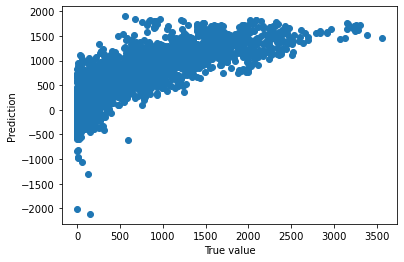

In [124]:
y_pred = linearModel.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("True value")
plt.ylabel('Prediction')
plt.show()
plt.close()

### 4.2. Ridge(L2) Regression

In [125]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : -45.39022780992718
0.5 : -45.38373812192737
0.75 : -45.377251948749944
1.0 : -45.370769287318105
1.25 : -45.36429013455938
1.5 : -45.357814487405015
1.75 : -45.35134234279082
2.0 : -45.34487369765601


In [152]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)

y_pred = ridgeModelChosen.predict(X_test)

# Evaluating the Ridge Regression model
print("R-Square Value", ridgeModelChosen.score(X_test, y_test))
print ("mean_absolute_error :",mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_pred)))

R-Square Value 0.5761086103135706
mean_absolute_error : 321.4290890926795
mean_squared_error :  177978.1314420293
root_mean_squared_error :  421.874544671789


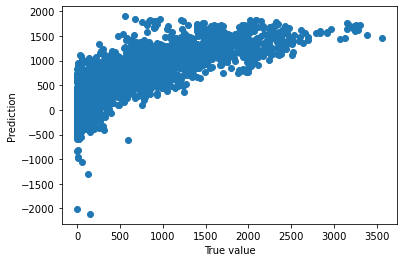

In [127]:
y_pred = ridgeModelChosen.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("True value")
plt.ylabel('Prediction')
plt.show()
plt.close()

### 4.3. Lasso(L1) Regression:

In [128]:
# List to maintain the cross-validation scores
cross_val_scores_lasso = []
 
# List to maintain the different values of Lambda
Lambda = []
 
# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : -45.202471658824685
0.5 : -44.942539880697986
0.75 : -44.58017244611441
1.0 : -44.25152723300296
1.25 : -43.976450318250684
1.5 : -43.61148492872559
1.75 : -43.395790677610876
2.0 : -43.10687552166023


In [154]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2, tol = 0.09)
lassoModelChosen.fit(X_train, y_train)

y_pred = lassoModelChosen.predict(X_test)

# Evaluating the Lasso Regression model
print("R-Square Value : ", lassoModelChosen.score(X_test, y_test))
print ("mean_absolute_error :",mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_pred)))

R-Square Value :  0.5770529045627886
mean_absolute_error : 320.50727165968
mean_squared_error :  177581.65316930105
root_mean_squared_error :  421.4043820005922


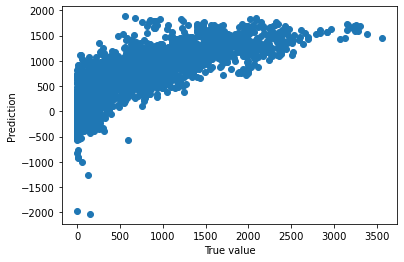

In [130]:
y_pred = lassoModelChosen.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("True value")
plt.ylabel('Prediction')
plt.show()
plt.close()

In [131]:
# Building the two lists for visualization
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [linearModel.score(X_test, y_test),
         ridgeModelChosen.score(X_test, y_test),
         lassoModelChosen.score(X_test, y_test)]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Linear Regreesion'] = linearModel.score(X_test, y_test)
mapping['Ridge  Regreesion'] = ridgeModelChosen.score(X_test, y_test)
mapping['Lasso  Regression'] = lassoModelChosen.score(X_test, y_test)
 
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

Linear Regreesion : 0.5761169589667396
Ridge  Regreesion : 0.5761086103135706
Lasso  Regression : 0.5770529045627886


### 4.4. Random Forest Regressor

In [132]:
rc = RandomForestRegressor(n_estimators= 100, criterion= 'mse')
rc.fit(X_train, y_train)
cv = cross_validate(rc, X_train, y_train, cv = 10)
print(cv)

{'fit_time': array([1.73742723, 1.76869798, 1.77580476, 1.69136739, 1.64622259,
       1.63780856, 1.66407084, 1.62133431, 1.62951756, 1.70101976]), 'score_time': array([0.02172112, 0.01994681, 0.02393532, 0.01895118, 0.01894999,
       0.01995111, 0.01994872, 0.02003384, 0.02293944, 0.02094293]), 'test_score': array([0.9132194 , 0.90824484, 0.90305859, 0.91017124, 0.93087116,
       0.92578594, 0.91480953, 0.91545607, 0.93048771, 0.90224024])}


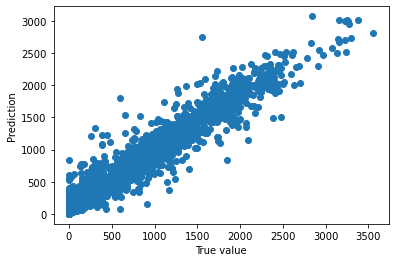

In [133]:
y_pred = rc.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("True value")
plt.ylabel('Prediction')
plt.show()
plt.close()

In [134]:
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_pred)))

R-Square Value 0.9277093594816479
mean_absolute_error : 109.40095509893456
mean_squared_error :  30352.475736111115
root_mean_squared_error :  174.21961926290368


### 4.5. Decision Tree Regressor

In [160]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,y)
print("R-Squared on train dataset={}".format(dtm.score(X_train,y_train)))

dtm.fit(X_test,y_test)   
y_pred = dtm.predict(X_test)
print("R-Squaredon test dataset :", dtm.score(X_test,y_test))
print ("root_mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_pred)))

R-Squared on train dataset=0.6674350962658037
R-Squaredon test dataset : 0.6564507935973357
root_mean_squared_error :  379.7960982146837


### 4.6 Grid search on Decision Tree Regressor

In [161]:
param_grid = {"criterion": ["mse", "mae", "rmse"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,y)

y_pred = grid_cv_dtm.predict(X_test)

print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print ("root_mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.4018096158473911
root_mean_squared_error :  266.4732743790408
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}


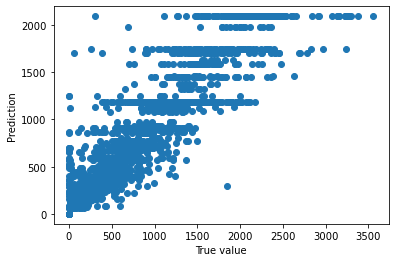

In [122]:
y_pred = grid_cv_dtm.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("True value")
plt.ylabel('Prediction')
plt.show()
plt.close()

### 4.7 Grid Search on Kernel Ridge Regression

In [144]:
def prepare_data_to_KRR(x_data, f):
    X = []
    columns = x_data.columns
    for i in range(len(f)):
        X_term = []
        for col in columns:
            X_term.append(x_data[col][i])
        #X_term.append(x2[i][j])
        X.append(X_term)
    X=np.array(X)
    y=np.array(f)
    return X,y

# Prepare X and y for KRR
X_grid,y_grid = prepare_data_to_KRR(X,y)

In [145]:
def KRR_function(hyperparams,X,y):
    # Assign hyper-parameters
    alpha_value,gamma_value = hyperparams
    # Initialize lists with final results
    y_pred_total = []
    y_test_total = []
    # Split data into test and train: random state fixed for reproducibility
    kf = KFold(n_splits=10,shuffle=True,random_state=2020)
    # kf-fold cross-validation loop
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Scale X_train and X_test
        scaler = StandardScaler().fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        # Fit KRR with (X_train_scaled, y_train), and predict X_test_scaled
        KRR = KernelRidge(kernel='rbf',alpha=alpha_value,gamma=gamma_value)
        y_pred = KRR.fit(X_train_scaled, y_train).predict(X_test_scaled)
        # Append y_pred and y_test values of this k-fold step to list with total values
        y_pred_total.append(y_pred)
        y_test_total.append(y_test)
    # Flatten lists with test and predicted values
    y_pred_total = [item for sublist in y_pred_total for item in sublist]
    y_test_total = [item for sublist in y_test_total for item in sublist]
    # Calculate error metric of test and predicted values: rmse
    rmse = np.sqrt(mean_squared_error(y_test_total, y_pred_total))
    r_pearson,_=pearsonr(y_test_total,y_pred_total)
    print('KRR k-fold cross-validation . alpha: %7.6f, gamma: %7.4f, RMSE: %7.4f, r: %7.4f' %(alpha_value,gamma_value,rmse,r_pearson))
    return rmse

In [146]:
def create_hyperparams_grid(X,y):
    graph_x = []
    graph_y = []
    graph_z = []
    for alpha_value in np.arange(-1.0,2.0,1):
        alpha_value = pow(10,alpha_value)
        graph_x_row = []
        graph_y_row = []
        graph_z_row = []
        for gamma_value in np.arange(0.0,11,2):
            hyperparams = (alpha_value,gamma_value)
            rmse = KRR_function(hyperparams,X,y)
            graph_x_row.append(alpha_value)
            graph_y_row.append(gamma_value)
            graph_z_row.append(rmse)
        graph_x.append(graph_x_row)
        graph_y.append(graph_y_row)
        graph_z.append(graph_z_row)
        print('')
    graph_x=np.array(graph_x)
    graph_y=np.array(graph_y)
    graph_z=np.array(graph_z)
    min_z = np.min(graph_z)
    pos_min_z = np.argwhere(graph_z == np.min(graph_z))[0]
    print('Minimum RMSE: %.4f' %(min_z))
    print('Optimum alpha: %f' %(graph_x[pos_min_z[0],pos_min_z[1]]))
    print('Optimum gamma: %f' %(graph_y[pos_min_z[0],pos_min_z[1]]))
    return graph_x,graph_y,graph_z

In [147]:
# Create hyperparams grid
graph_x,graph_y,graph_z = create_hyperparams_grid(X_grid,y_grid)

KRR k-fold cross-validation . alpha: 0.100000, gamma:  0.0000, RMSE: 645.0330, r: -0.0309
KRR k-fold cross-validation . alpha: 0.100000, gamma:  2.0000, RMSE: 328.4532, r:  0.8813
KRR k-fold cross-validation . alpha: 0.100000, gamma:  4.0000, RMSE: 484.5460, r:  0.7750
KRR k-fold cross-validation . alpha: 0.100000, gamma:  6.0000, RMSE: 598.2115, r:  0.6809
KRR k-fold cross-validation . alpha: 0.100000, gamma:  8.0000, RMSE: 677.3507, r:  0.6048
KRR k-fold cross-validation . alpha: 0.100000, gamma: 10.0000, RMSE: 733.5972, r:  0.5435

KRR k-fold cross-validation . alpha: 1.000000, gamma:  0.0000, RMSE: 645.0330, r: -0.0309
KRR k-fold cross-validation . alpha: 1.000000, gamma:  2.0000, RMSE: 407.0721, r:  0.8443
KRR k-fold cross-validation . alpha: 1.000000, gamma:  4.0000, RMSE: 578.3446, r:  0.7302
KRR k-fold cross-validation . alpha: 1.000000, gamma:  6.0000, RMSE: 686.0854, r:  0.6384
KRR k-fold cross-validation . alpha: 1.000000, gamma:  8.0000, RMSE: 754.4428, r:  0.5678
KRR k-fol

# Consolidated scores of the models